# cifar100 dataset - image classification of 100 categories

https://www.cs.toronto.edu/~kriz/cifar.html

https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [1]:
#from functions import *
#from labels import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, f1_score, roc_auc_score, mean_squared_error
import tensorflow as tf
from tensorflow.python.client import device_lib
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import cifar100

In [2]:
def plot_model(model): 
    
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    
    axs[0].plot(model.history['accuracy']) 
    axs[0].plot(model.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    
    axs[1].plot(model.history['loss']) 
    axs[1].plot(model.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    
    plt.show()

In [3]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)

    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))

    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center", color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

In [4]:
tf.__version__

'2.3.1'

In [5]:
keras.__version__

'2.4.3'

In [6]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4140167634137606750
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9754953207053605493
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15687541056
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15340089740539010015
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11724115312054003180
physical_device_desc: "device: XLA_GPU device"
]


In [7]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [8]:
# The data, shuffled and split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [9]:
X_train.shape

(50000, 32, 32, 3)

# 1. Labels

In [10]:
y_train.shape

(50000, 1)

In [11]:
labels_dictionary = {0: 'apple',
 1: 'aquarium_fish',
 2: 'baby',
 3: 'bear',
 4: 'beaver',
 5: 'bed',
 6: 'bee',
 7: 'beetle',
 8: 'bicycle',
 9: 'bottle',
 10: 'bowl',
 11: 'boy',
 12: 'bridge',
 13: 'bus',
 14: 'butterfly',
 15: 'camel',
 16: 'can',
 17: 'castle',
 18: 'caterpillar',
 19: 'cattle',
 20: 'chair',
 21: 'chimpanzee',
 22: 'clock',
 23: 'cloud',
 24: 'cockroach',
 25: 'couch',
 26: 'crab',
 27: 'crocodile',
 28: 'cup',
 29: 'dinosaur',
 30: 'dolphin',
 31: 'elephant',
 32: 'flatfish',
 33: 'forest',
 34: 'fox',
 35: 'girl',
 36: 'hamster',
 37: 'house',
 38: 'kangaroo',
 39: 'computer_keyboard',
 40: 'lamp',
 41: 'lawn_mower',
 42: 'leopard',
 43: 'lion',
 44: 'lizard',
 45: 'lobster',
 46: 'man',
 47: 'maple_tree',
 48: 'motorcycle',
 49: 'mountain',
 50: 'mouse',
 51: 'mushroom',
 52: 'oak_tree',
 53: 'orange',
 54: 'orchid',
 55: 'otter',
 56: 'palm_tree',
 57: 'pear',
 58: 'pickup_truck',
 59: 'pine_tree',
 60: 'plain',
 61: 'plate',
 62: 'poppy',
 63: 'porcupine',
 64: 'possum',
 65: 'rabbit',
 66: 'raccoon',
 67: 'ray',
 68: 'road',
 69: 'rocket',
 70: 'rose',
 71: 'sea',
 72: 'seal',
 73: 'shark',
 74: 'shrew',
 75: 'skunk',
 76: 'skyscraper',
 77: 'snail',
 78: 'snake',
 79: 'spider',
 80: 'squirrel',
 81: 'streetcar',
 82: 'sunflower',
 83: 'sweet_pepper',
 84: 'table',
 85: 'tank',
 86: 'telephone',
 87: 'television',
 88: 'tiger',
 89: 'tractor',
 90: 'train',
 91: 'trout',
 92: 'tulip',
 93: 'turtle',
 94: 'wardrobe',
 95: 'whale',
 96: 'willow_tree',
 97: 'wolf',
 98: 'woman',
 99: 'worm'}

In [12]:
labels_dictionary[0]

'apple'

In [13]:
labels_dictionary = pd.DataFrame.from_dict(labels_dictionary, orient="index")
labels_dictionary

0
0           apple
1   aquarium_fish
2            baby
3            bear
4          beaver
..            ...
95          whale
96    willow_tree
97           wolf
98          woman
99           worm

[100 rows x 1 columns]

# 2. Training set

In [14]:
X_train.shape

(50000, 32, 32, 3)

### First image

In [15]:
X_train[0].shape

(32, 32, 3)

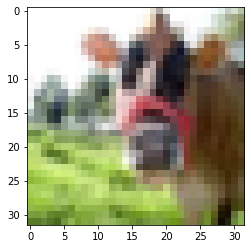

In [16]:
plt.imshow(X_train[0])

### Last image

In [17]:
X_train[-1].shape

(32, 32, 3)

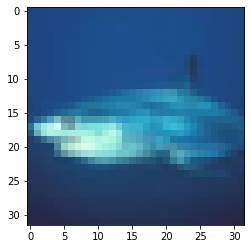

In [18]:
plt.imshow(X_train[-1])

### Every 10 000th image

In [19]:
images_to_show = []
for i, image in enumerate(X_train):
    if (i + 1) % 1000 == 0:
        images_to_show.append(i)

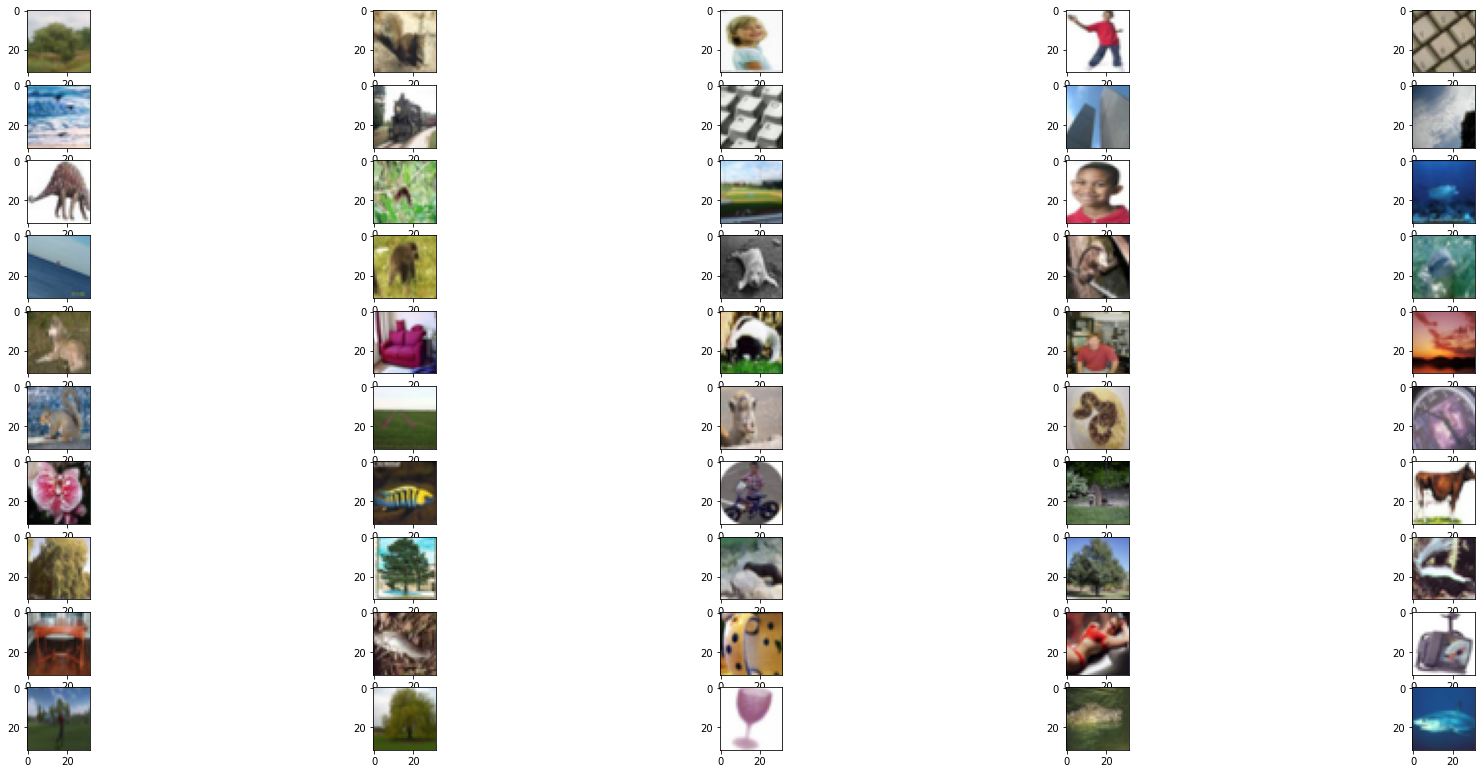

In [20]:
plt.figure(figsize=(30,15))
columns = 5
for i, image in enumerate(X_train[images_to_show]):
    plt.subplot(len(images_to_show) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [21]:
labels_to_concat = []
for i in range(len(y_train)):
    if (i + 1) % 1000 == 0:
        #print(y_train[i])
        labels_to_concat.append(y_train[i])

In [22]:
labels_to_concat = pd.DataFrame(labels_to_concat, columns=["idx"])
labels_to_concat = labels_to_concat.set_index("idx")

In [23]:
pd.concat([labels_to_concat, labels_dictionary], axis=1, join="inner")

0
96        willow_tree
80           squirrel
35               girl
11                boy
39  computer_keyboard
71                sea
90              train
76         skyscraper
23              cloud
29           dinosaur
18        caterpillar
60              plain
67                ray
66            raccoon
72               seal
64             possum
30            dolphin
97               wolf
25              couch
75              skunk
46                man
15              camel
78              snake
22              clock
54             orchid
1       aquarium_fish
8             bicycle
19             cattle
59          pine_tree
55              otter
52           oak_tree
84              table
91              trout
28                cup
98              woman
87         television
33             forest
27          crocodile
73              shark

# 3. Test set

In [24]:
X_test.shape

(10000, 32, 32, 3)

### First image

In [25]:
X_test[0].shape

(32, 32, 3)

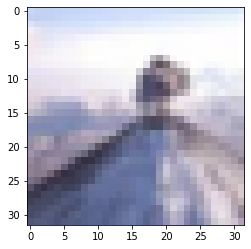

In [26]:
plt.imshow(X_test[0])

### Last image

In [27]:
X_test[-1].shape

(32, 32, 3)

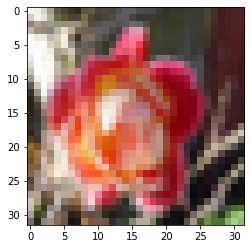

In [28]:
plt.imshow(X_test[-1])

### Every 1000th image

In [29]:
images_to_show = []
for i, image in enumerate(X_test):
    if (i + 1) % 1000 == 0:
        images_to_show.append(i)

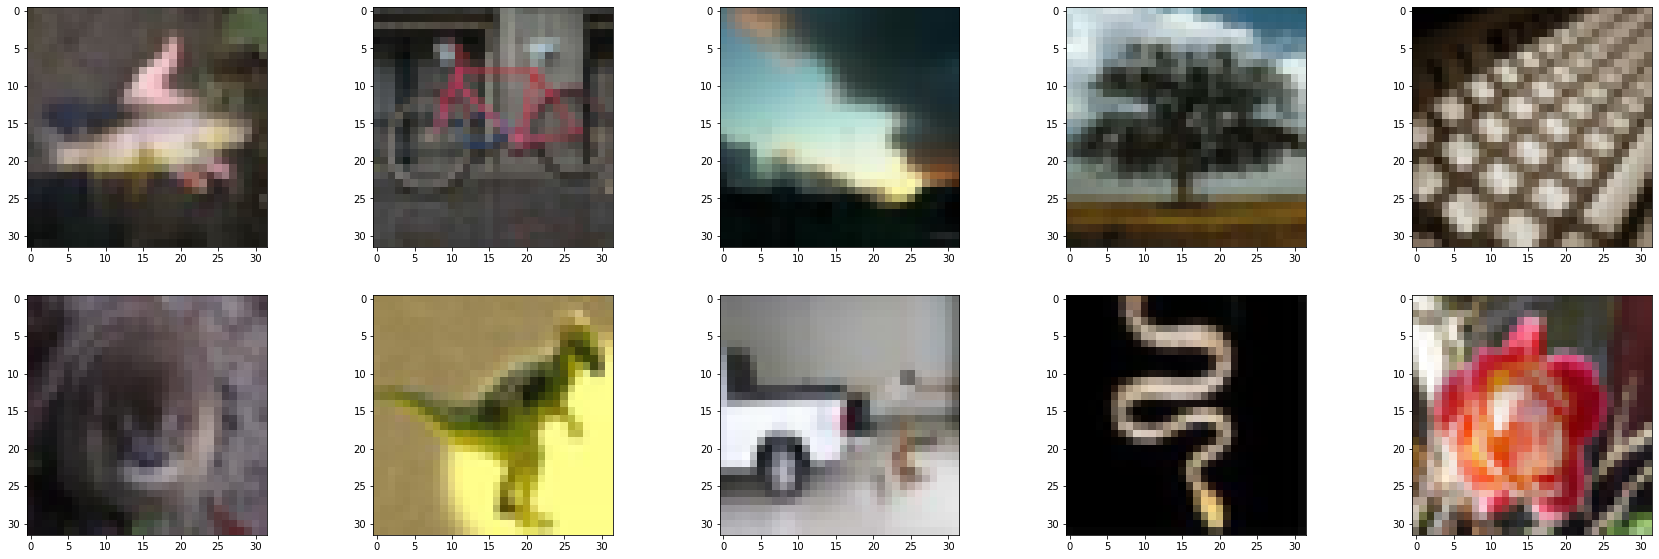

In [30]:
plt.figure(figsize=(30,15))
columns = 5
for i, image in enumerate(X_test[images_to_show]):
    plt.subplot(len(images_to_show) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [31]:
labels_to_concat = []
for i in range(len(y_test)):
    if (i + 1) % 1000 == 0:
        #print(y_train[i])
        labels_to_concat.append(y_test[i])

In [32]:
labels_to_concat = pd.DataFrame(labels_to_concat, columns=["idx"])
labels_to_concat = labels_to_concat.set_index("idx")

In [33]:
pd.concat([labels_to_concat, labels_dictionary], axis=1, join="inner")

0
91              trout
8             bicycle
23              cloud
52           oak_tree
39  computer_keyboard
55              otter
29           dinosaur
58       pickup_truck
78              snake
70               rose

# 4. Baseline model

### Setting number of classes

In [34]:
num_classes = 100

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Being a member of a class is now vectiorized

In [35]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### Converting all values to floats

In [36]:
X_train.max()

255

In [37]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# 4.1 Model 1 - no Pooling

In [38]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
# model1.add(MaxPool2D((2, 2)))
model1.add(Dropout(0.1))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
# model1.add(MaxPool2D((2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
# model1.add(MaxPool2D((2, 2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
# model1.add(MaxPool2D((2, 2)))
model1.add(Dropout(0.4))

model1.add(Flatten())
model1.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='softmax'))

In [39]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        2

In [40]:
batch_size = 30
epochs=2000

In [41]:
optimizer_1 = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")

In [42]:
model1.compile(loss="categorical_crossentropy", optimizer=optimizer_1, metrics=["accuracy"])

In [43]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [44]:
model1history = model1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), shuffle=True, verbose=1, callbacks=[es, mc])

Epoch 1/2000
1667/1667 [==============================] - ETA: 0s - loss: 3.7441 - accuracy: 0.1601
Epoch 00001: val_accuracy improved from -inf to 0.31150, saving model to best_model.h5
1667/1667 [==============================] - 86s 52ms/step - loss: 3.7441 - accuracy: 0.1601 - val_loss: 2.7899 - val_accuracy: 0.3115
Epoch 2/2000
1667/1667 [==============================] - ETA: 0s - loss: 2.7209 - accuracy: 0.3157
Epoch 00002: val_accuracy improved from 0.31150 to 0.39180, saving model to best_model.h5
1667/1667 [==============================] - 86s 51ms/step - loss: 2.7209 - accuracy: 0.3157 - val_loss: 2.3541 - val_accuracy: 0.3918
Epoch 3/2000
1667/1667 [==============================] - ETA: 0s - loss: 2.2796 - accuracy: 0.4040
Epoch 00003: val_accuracy improved from 0.39180 to 0.44960, saving model to best_model.h5
1667/1667 [==============================] - 86s 51ms/step - loss: 2.2796 - accuracy: 0.4040 - val_loss: 2.1002 - val_accuracy: 0.4496
Epoch 4/2000
1667/1667 [====

In [45]:
accuracy_score(np.argmax(y_test, axis=1), model1.predict_classes(X_test))

0.4682

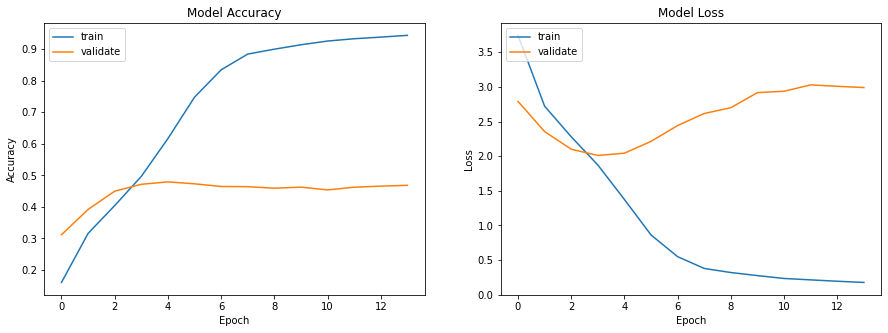

In [46]:
plot_model(model1history)

In [47]:
labels = labels_dictionary[0]
labels

0             apple
1     aquarium_fish
2              baby
3              bear
4            beaver
          ...      
95            whale
96      willow_tree
97             wolf
98            woman
99             worm
Name: 0, Length: 100, dtype: object

In [48]:
pred = model1.predict(X_test)

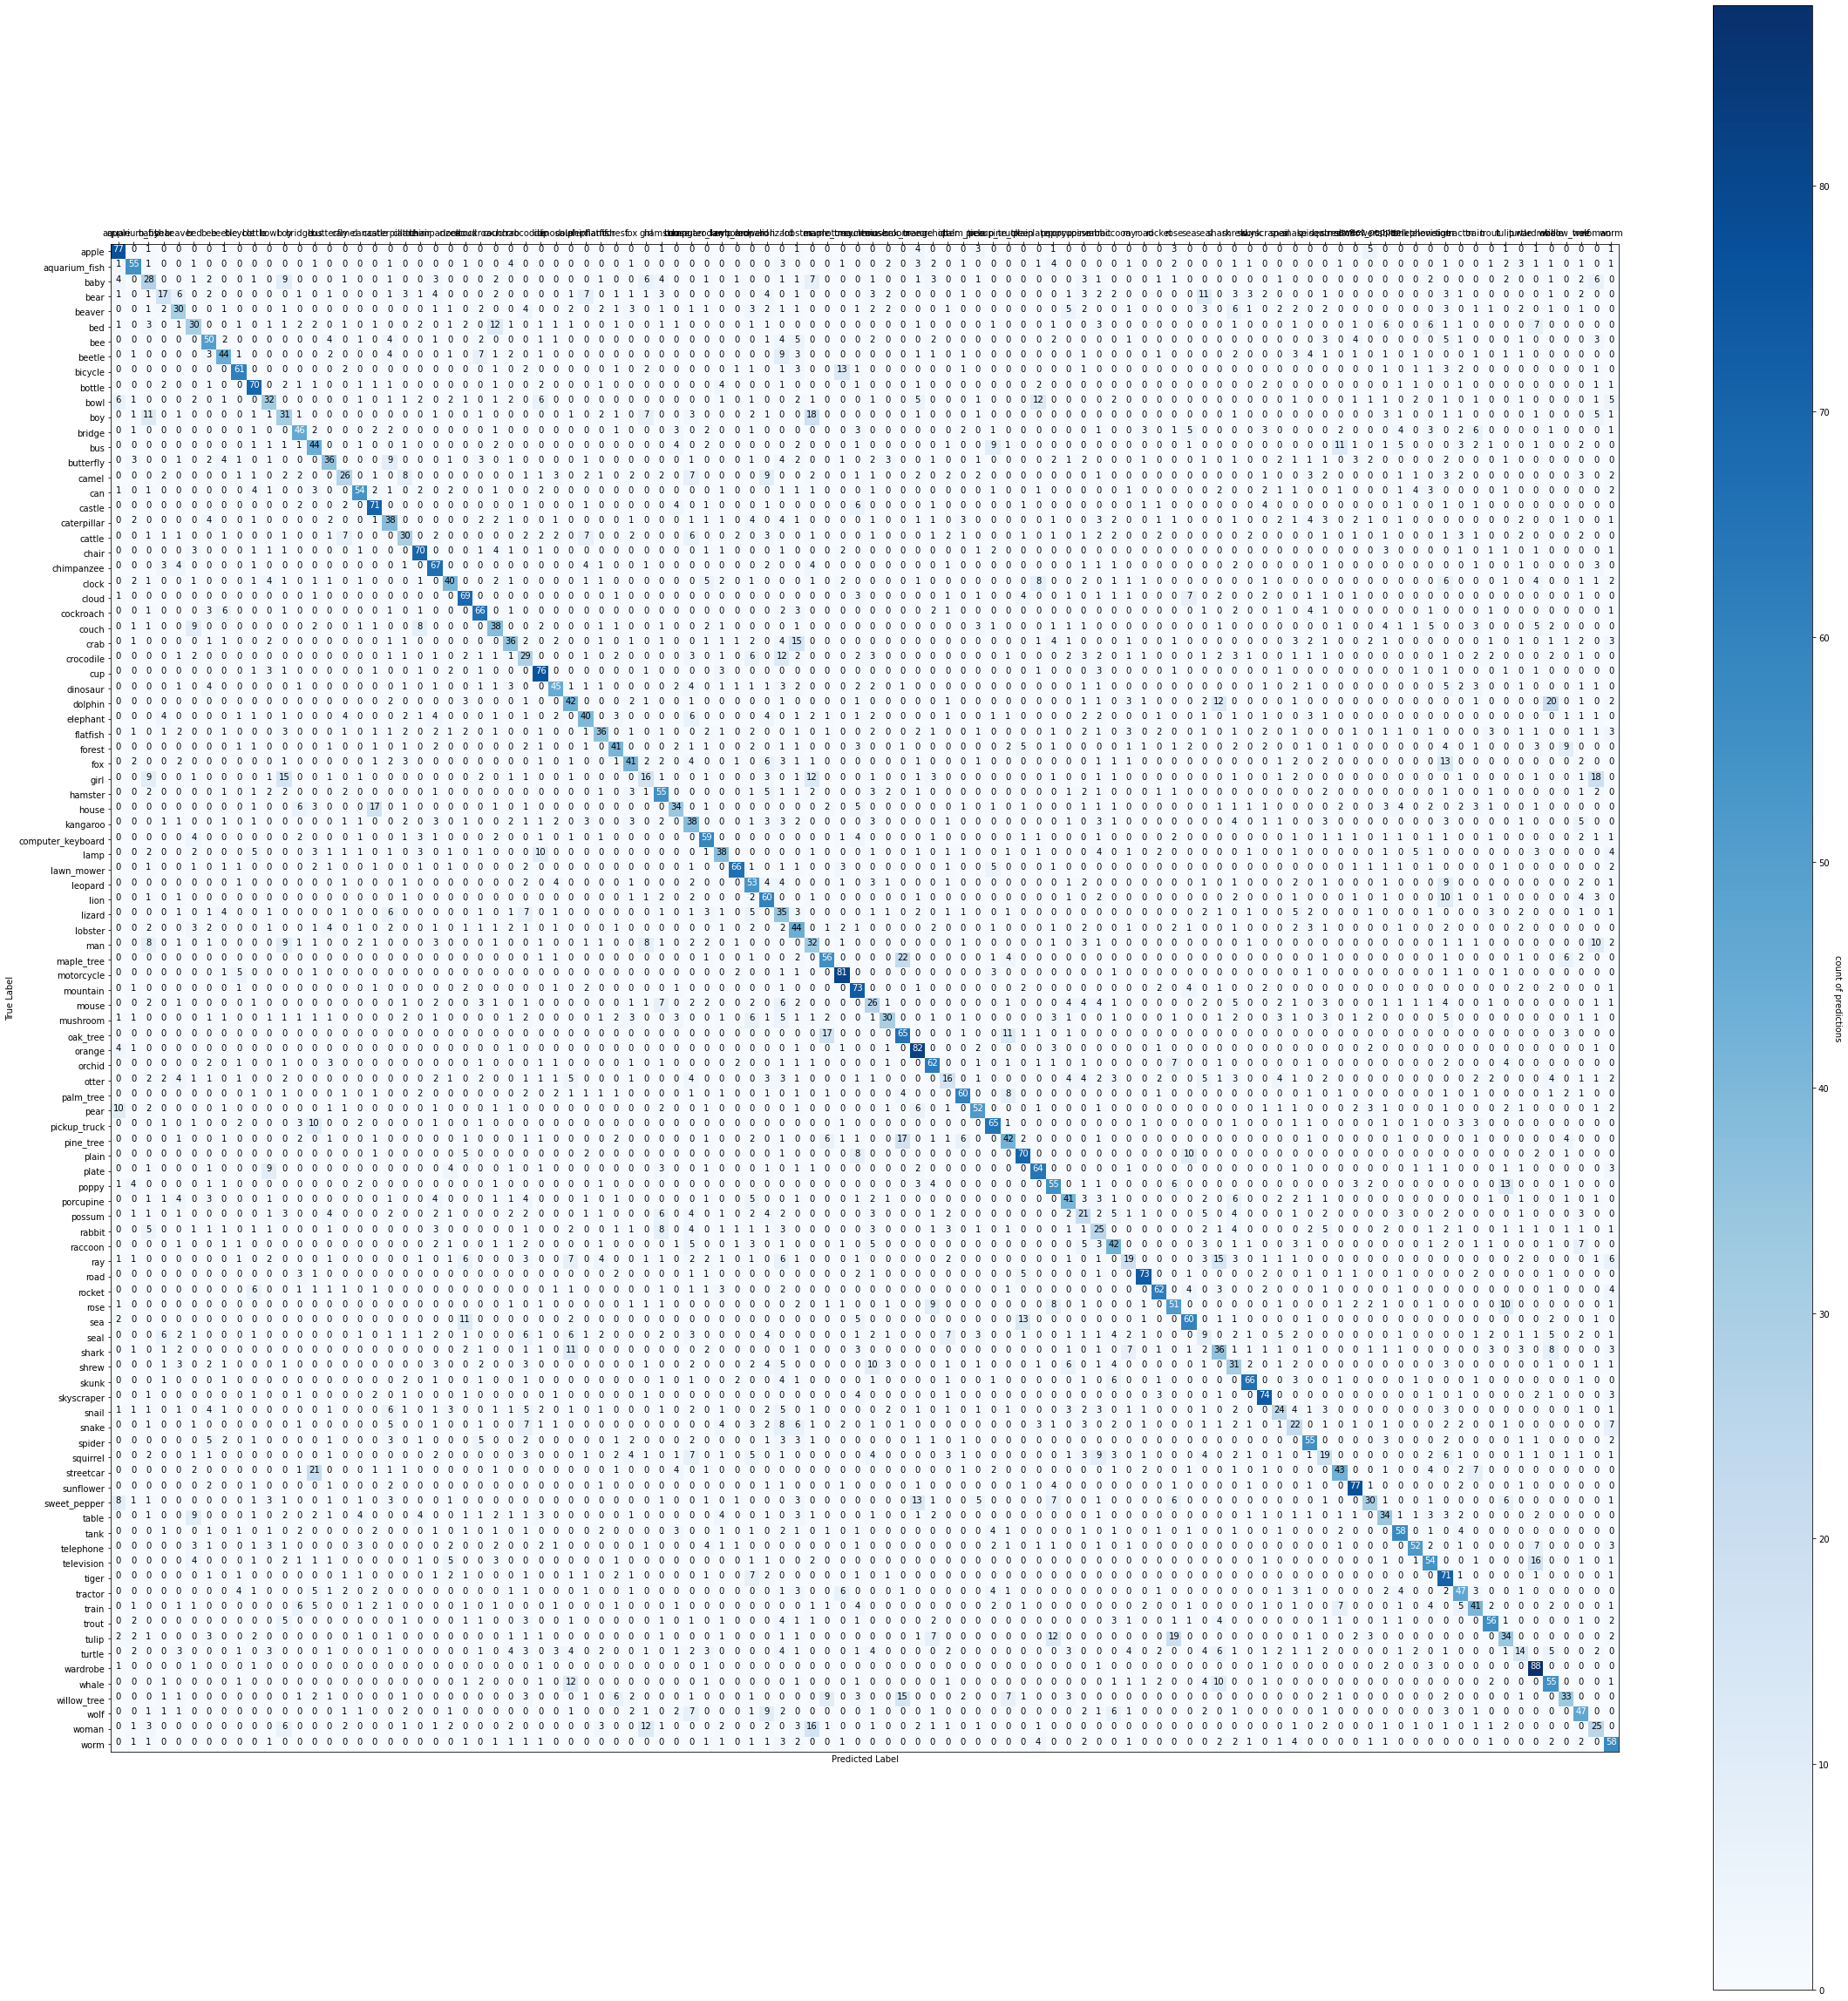

In [49]:
y_pred_classes = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_test[errors]

cm = confusion_matrix(y_true, y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(32,32))
im, cbar = heatmap(cm, labels, labels, ax=ax, cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

### Classification report

In [50]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69       100
           1       0.60      0.55      0.57       100
           2       0.27      0.28      0.28       100
           3       0.34      0.17      0.23       100
           4       0.38      0.30      0.33       100
           5       0.35      0.30      0.32       100
           6       0.47      0.50      0.49       100
           7       0.54      0.44      0.49       100
           8       0.69      0.61      0.65       100
           9       0.61      0.70      0.65       100
          10       0.41      0.32      0.36       100
          11       0.28      0.31      0.30       100
          12       0.52      0.46      0.49       100
          13       0.38      0.44      0.41       100
          14       0.46      0.36      0.40       100
          15       0.44      0.26      0.33       100
          16       0.64      0.54      0.58       100
          17       0.61    

### Correct classifications

In [51]:
labels = labels_dictionary[0]
labels

0             apple
1     aquarium_fish
2              baby
3              bear
4            beaver
          ...      
95            whale
96      willow_tree
97             wolf
98            woman
99             worm
Name: 0, Length: 100, dtype: object

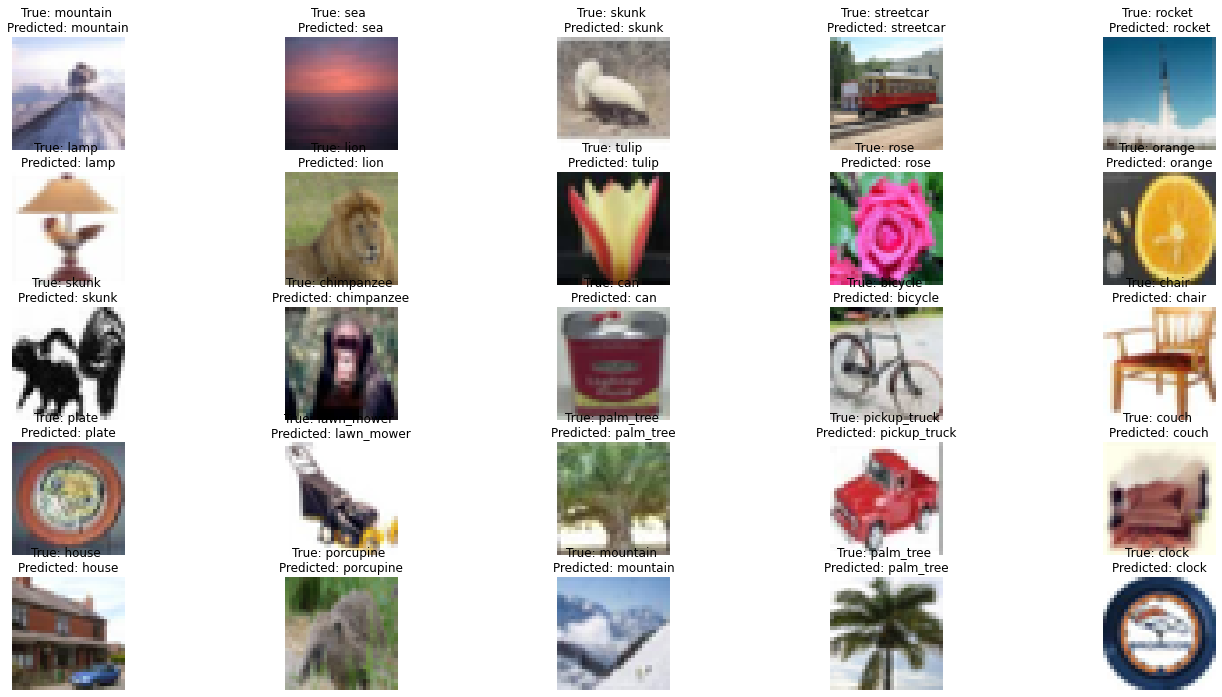

In [52]:
row = 5
column = 5
fig, axes = plt.subplots(row, column, figsize=(22,12))
axes = axes.ravel()

classified_idx = np.where(y_pred_classes == y_true)[0]
for i in np.arange(0, row*column):
    axes[i].imshow(X_test[classified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_true[classified_idx[i]]], 
                                                  labels[y_pred_classes[classified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

### Missclassifications

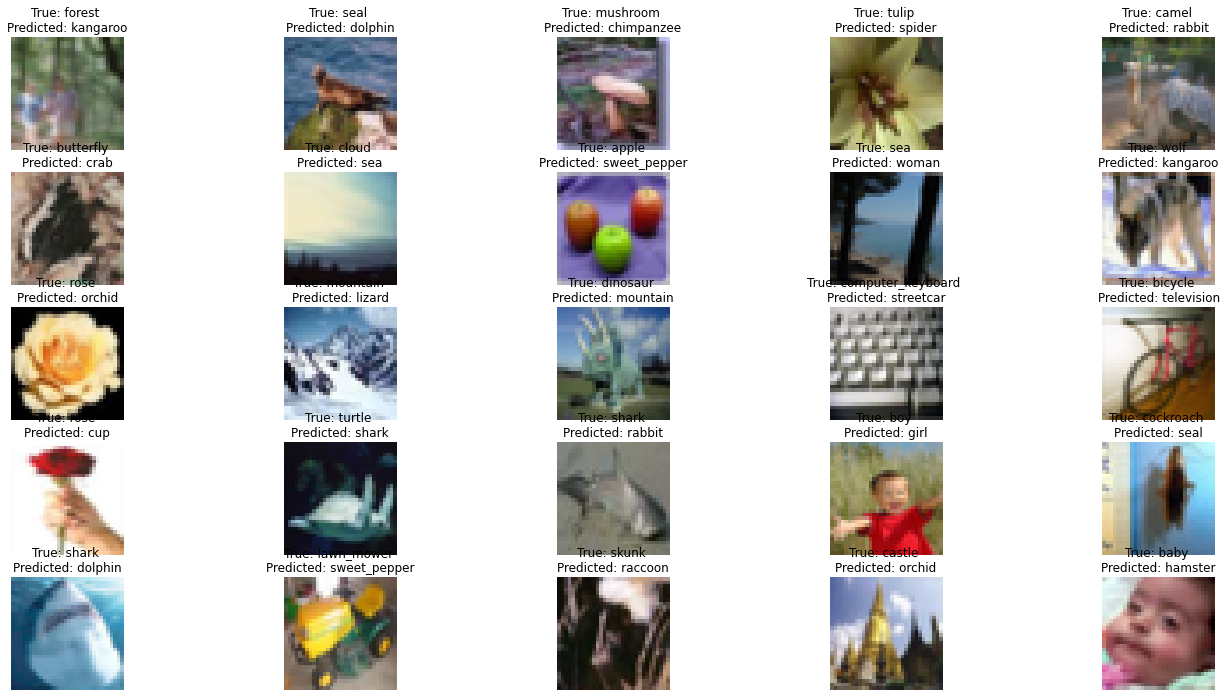

In [53]:
row = 5
column = 5
fig, axes = plt.subplots(row, column, figsize=(22,12))
axes = axes.ravel()

misclassified_idx = np.where(y_pred_classes != y_true)[0]
for i in np.arange(0, row*column):
    axes[i].imshow(X_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_true[misclassified_idx[i]]], 
                                                  labels[y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# 4.2 Model 2 - same architecture but with Pooling

In [54]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.3))

model2.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.4))

model2.add(Flatten())
model2.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(100, activation='softmax'))

In [55]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       

In [56]:
batch_size = 30
epochs=2000

In [57]:
optimizer_2 = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")

In [58]:
model2.compile(loss="categorical_crossentropy", optimizer=optimizer_2, metrics=["accuracy"])

In [59]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [60]:
model2history = model2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), shuffle=True, verbose=1, callbacks=[es, mc])

Epoch 1/2000
1667/1667 [==============================] - ETA: 0s - loss: 4.0760 - accuracy: 0.0989
Epoch 00001: val_accuracy improved from -inf to 0.20200, saving model to best_model.h5
1667/1667 [==============================] - 18s 11ms/step - loss: 4.0760 - accuracy: 0.0989 - val_loss: 3.2808 - val_accuracy: 0.2020
Epoch 2/2000
1665/1667 [============================>.] - ETA: 0s - loss: 3.1368 - accuracy: 0.2209
Epoch 00002: val_accuracy improved from 0.20200 to 0.32950, saving model to best_model.h5
1667/1667 [==============================] - 16s 10ms/step - loss: 3.1369 - accuracy: 0.2210 - val_loss: 2.5885 - val_accuracy: 0.3295
Epoch 3/2000
1665/1667 [============================>.] - ETA: 0s - loss: 2.7023 - accuracy: 0.3040
Epoch 00003: val_accuracy improved from 0.32950 to 0.34180, saving model to best_model.h5
1667/1667 [==============================] - 17s 10ms/step - loss: 2.7021 - accuracy: 0.3041 - val_loss: 2.5222 - val_accuracy: 0.3418
Epoch 4/2000
1665/1667 [====

In [61]:
accuracy_score(np.argmax(y_test, axis=1), model2.predict_classes(X_test))

0.6203

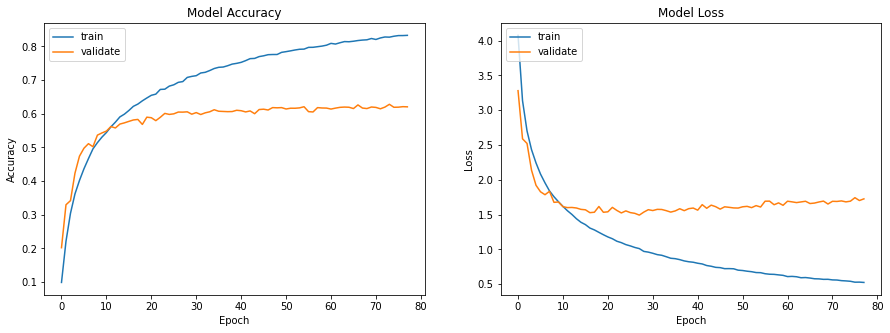

In [62]:
plot_model(model2history)

In [63]:
labels = labels_dictionary[0]
labels

0             apple
1     aquarium_fish
2              baby
3              bear
4            beaver
          ...      
95            whale
96      willow_tree
97             wolf
98            woman
99             worm
Name: 0, Length: 100, dtype: object

In [64]:
pred = model2.predict(X_test)

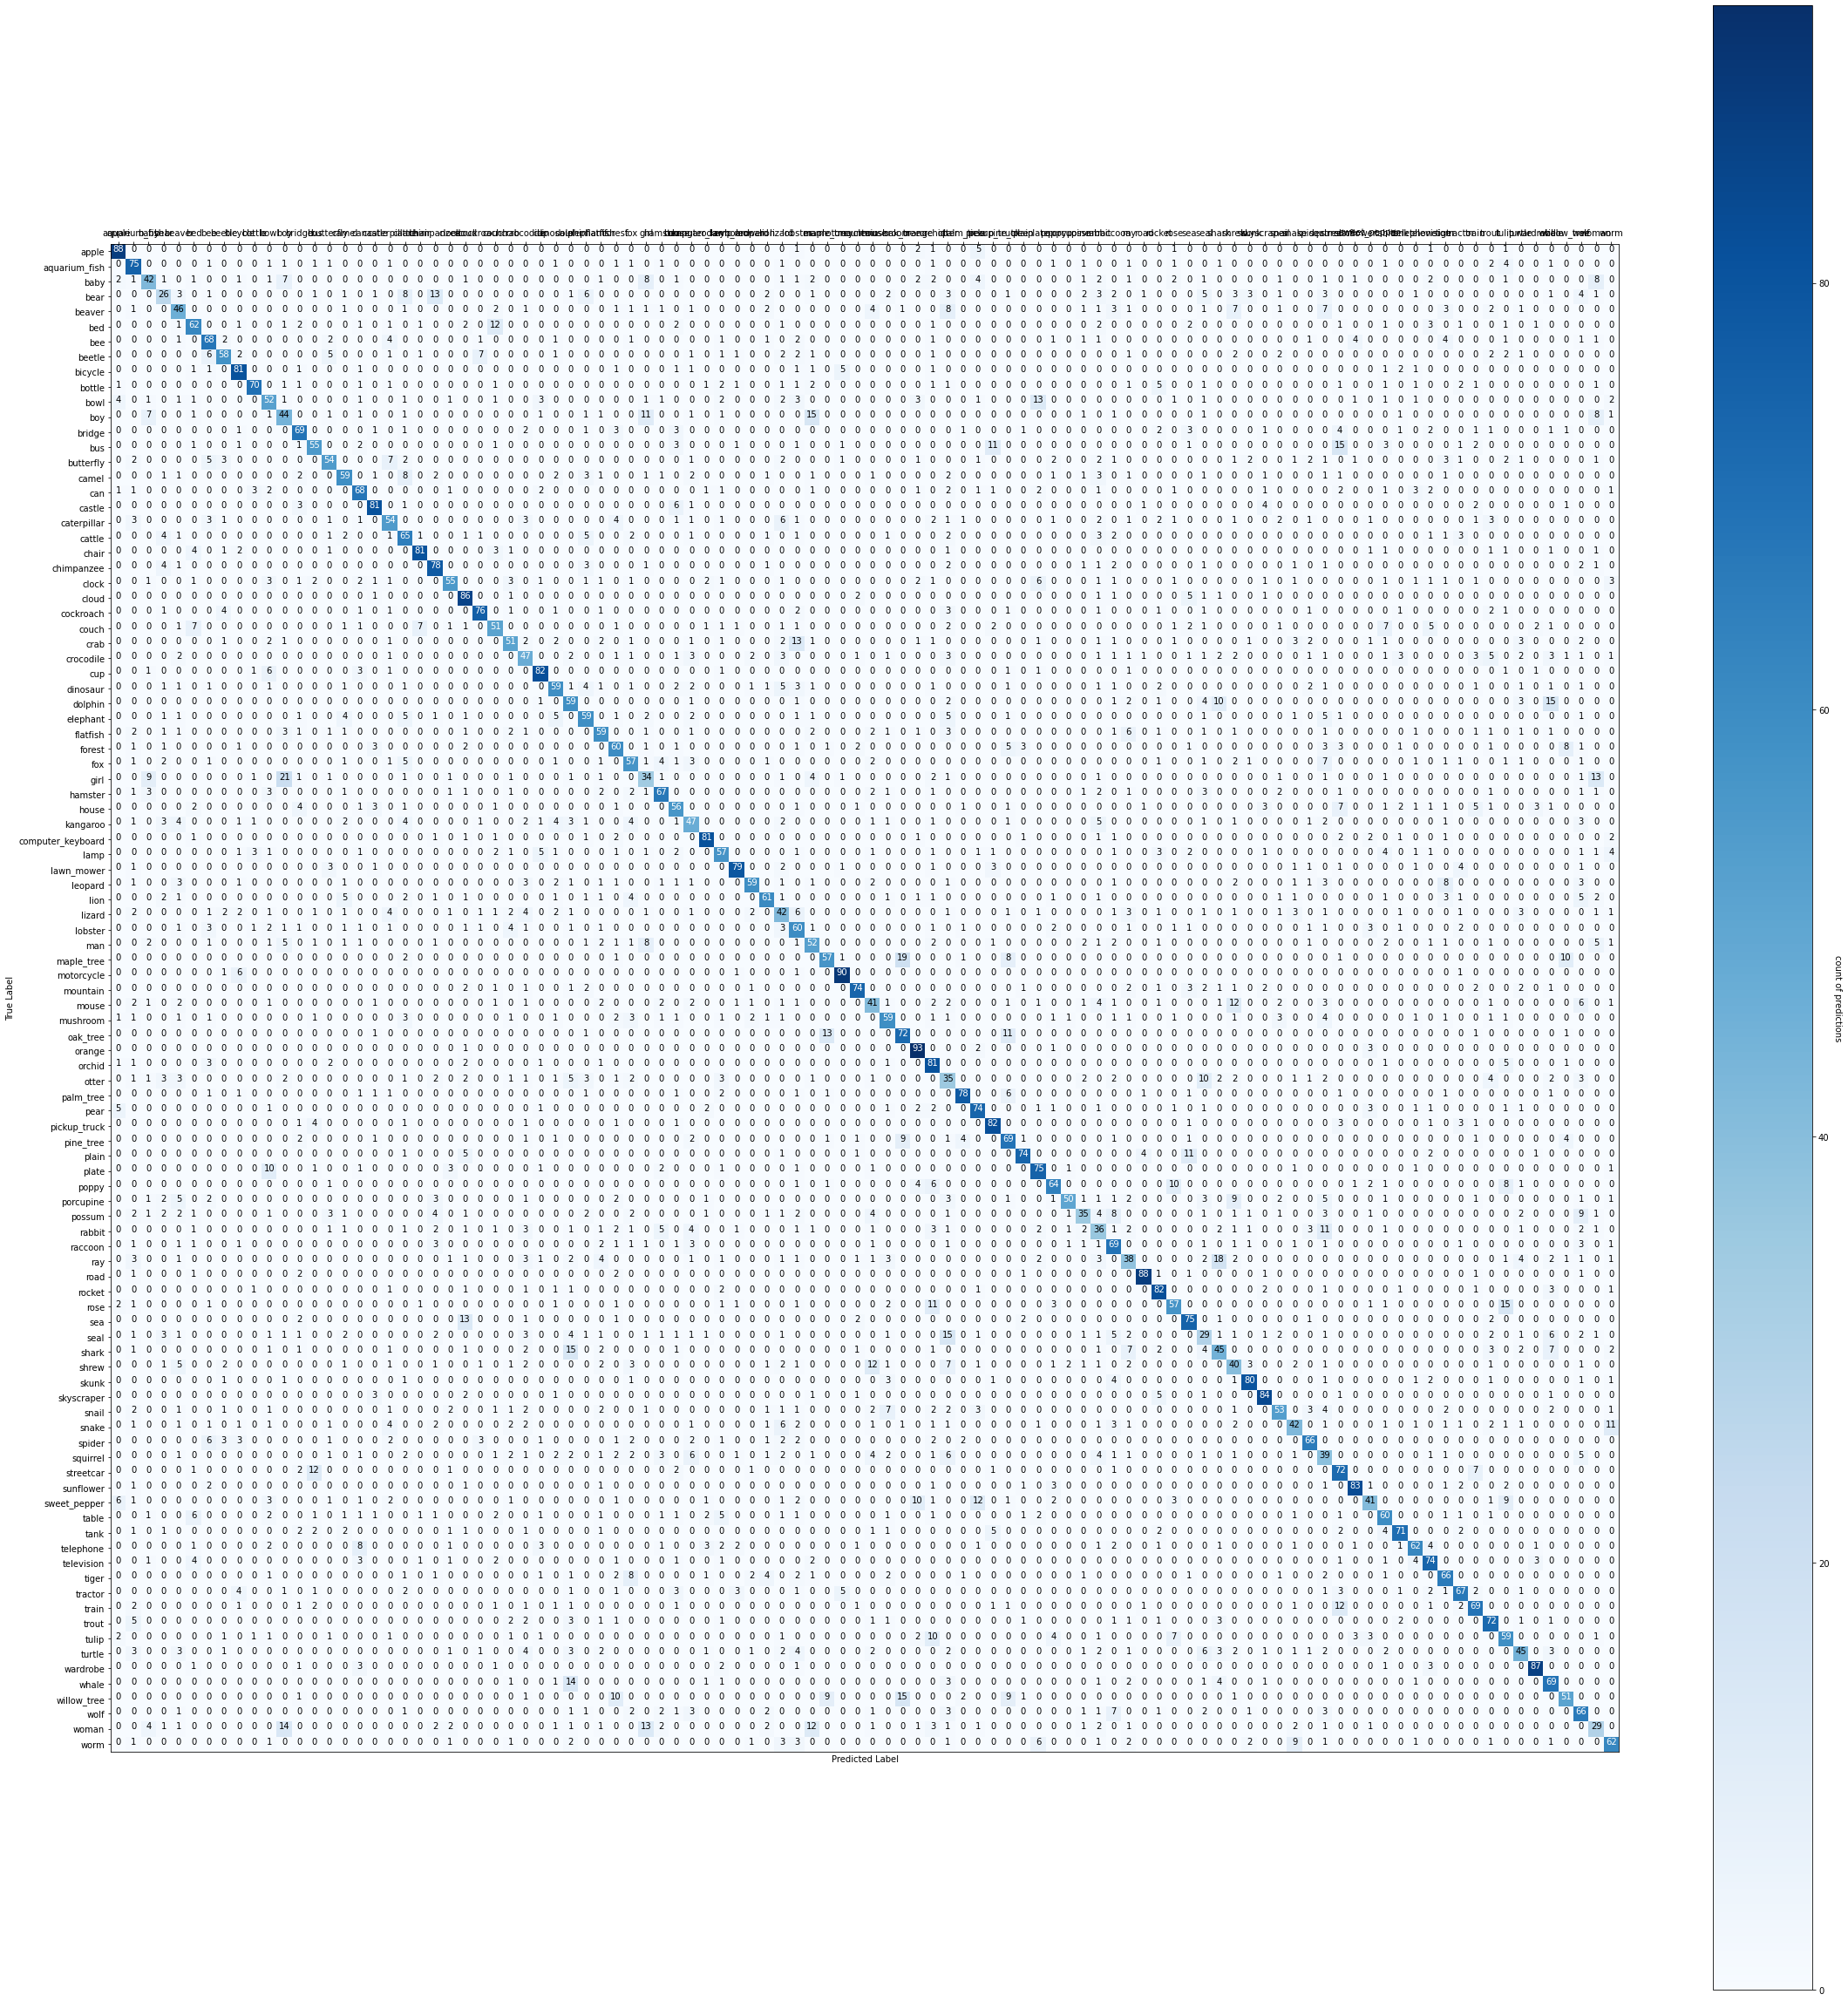

In [65]:
#labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_test[errors]

cm = confusion_matrix(y_true, y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(32,32))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

### Classification report

In [66]:
labels = labels_dictionary[0]
labels

0             apple
1     aquarium_fish
2              baby
3              bear
4            beaver
          ...      
95            whale
96      willow_tree
97             wolf
98            woman
99             worm
Name: 0, Length: 100, dtype: object

In [67]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       100
           1       0.60      0.75      0.67       100
           2       0.55      0.42      0.48       100
           3       0.43      0.26      0.32       100
           4       0.46      0.46      0.46       100
           5       0.63      0.62      0.62       100
           6       0.62      0.68      0.65       100
           7       0.71      0.58      0.64       100
           8       0.72      0.81      0.76       100
           9       0.85      0.70      0.77       100
          10       0.50      0.52      0.51       100
          11       0.42      0.44      0.43       100
          12       0.66      0.69      0.68       100
          13       0.65      0.55      0.59       100
          14       0.65      0.54      0.59       100
          15       0.65      0.59      0.62       100
          16       0.64      0.68      0.66       100
          17       0.80    

### Correct classifications

In [68]:
labels = labels_dictionary[0]
labels

0             apple
1     aquarium_fish
2              baby
3              bear
4            beaver
          ...      
95            whale
96      willow_tree
97             wolf
98            woman
99             worm
Name: 0, Length: 100, dtype: object

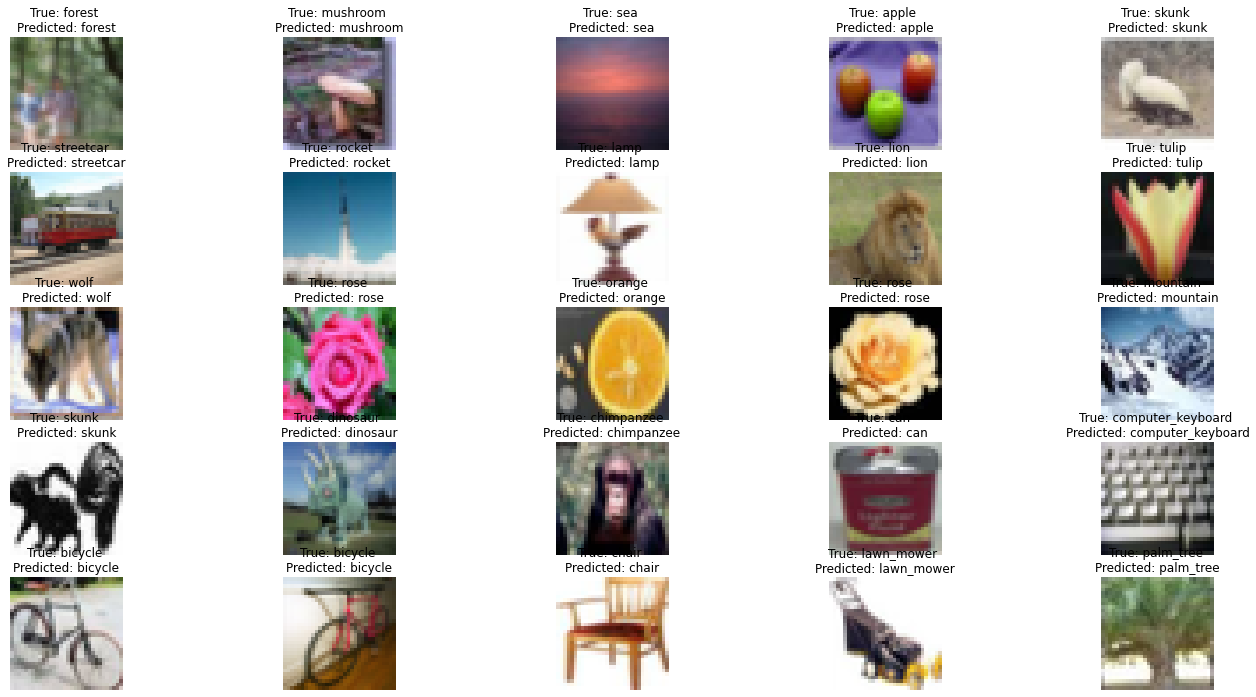

In [69]:
row = 5
column = 5
fig, axes = plt.subplots(row, column, figsize=(22,12))
axes = axes.ravel()

classified_idx = np.where(y_pred_classes == y_true)[0]
for i in np.arange(0, row*column):
    axes[i].imshow(X_test[classified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_true[classified_idx[i]]], 
                                                  labels[y_pred_classes[classified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

### Missclassifications

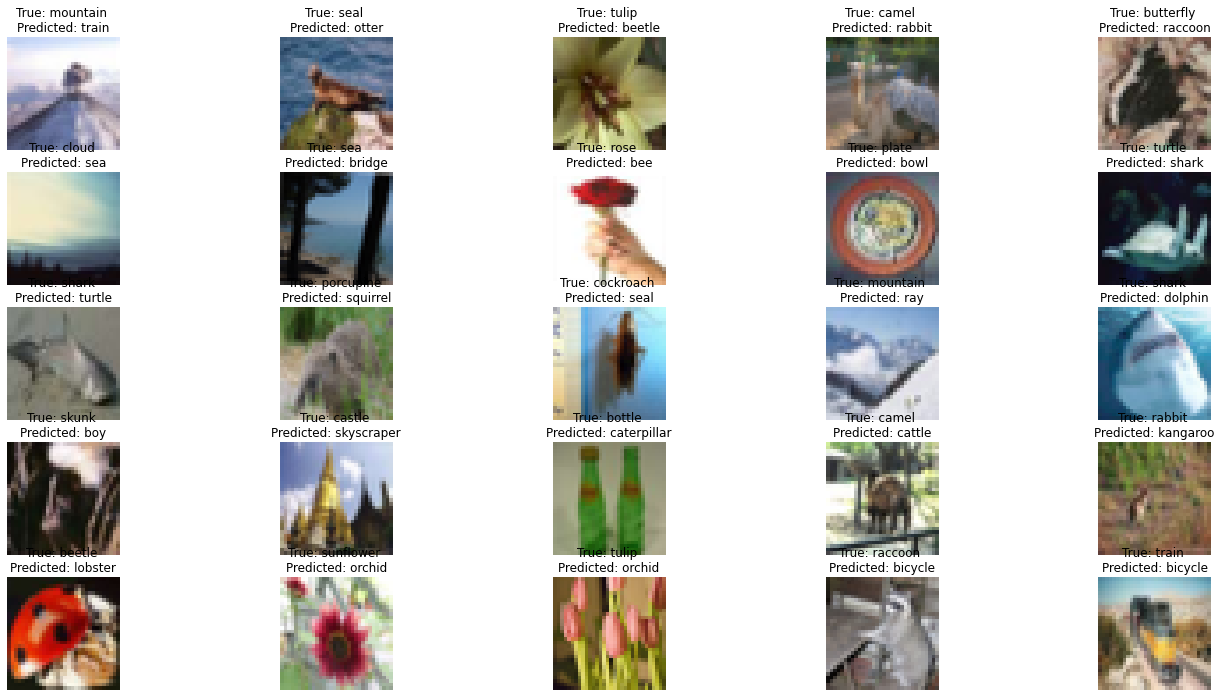

In [70]:
row = 5
column = 5
fig, axes = plt.subplots(row, column, figsize=(22,12))
axes = axes.ravel()

misclassified_idx = np.where(y_pred_classes != y_true)[0]
for i in np.arange(0, row*column):
    axes[i].imshow(X_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_true[misclassified_idx[i]]], 
                                                  labels[y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# 4.3 Model 3 - same architecture but with Pooling and Image Augmentation

In [71]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
# model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
# model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
# model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
# model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.4))

model3.add(Flatten())
model3.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(100, activation='softmax'))

# Image augmentation settings

In [72]:
# Image Data Generator , we are shifting image accross width and height also we are flipping the image horizantally.
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=10)
it_train = datagen.flow(X_train, y_train)
steps = int(X_train.shape[0] / 64)

In [73]:
batch_size = 30
epochs=2000

In [74]:
optimizer_2 = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")

In [75]:
model3.compile(loss="categorical_crossentropy", optimizer=optimizer_2, metrics=["accuracy"])

In [76]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [77]:
model3history = model3.fit_generator(it_train, epochs=epochs, steps_per_epoch=steps, validation_data=(X_test,y_test), shuffle=True, verbose=1, callbacks=[es, mc])

Epoch 1/2000
781/781 [==============================] - ETA: 0s - loss: 4.3380 - accuracy: 0.0816
Epoch 00001: val_accuracy improved from -inf to 0.15000, saving model to best_model.h5
781/781 [==============================] - 47s 61ms/step - loss: 4.3380 - accuracy: 0.0816 - val_loss: 3.9148 - val_accuracy: 0.1500
Epoch 2/2000
781/781 [==============================] - ETA: 0s - loss: 3.5539 - accuracy: 0.1649
Epoch 00002: val_accuracy improved from 0.15000 to 0.25310, saving model to best_model.h5
781/781 [==============================] - 47s 60ms/step - loss: 3.5539 - accuracy: 0.1649 - val_loss: 3.0988 - val_accuracy: 0.2531
Epoch 3/2000
780/781 [============================>.] - ETA: 0s - loss: 3.1333 - accuracy: 0.2332
Epoch 00003: val_accuracy improved from 0.25310 to 0.28740, saving model to best_model.h5
781/781 [==============================] - 47s 60ms/step - loss: 3.1331 - accuracy: 0.2334 - val_loss: 2.8814 - val_accuracy: 0.2874
Epoch 4/2000
781/781 [==================

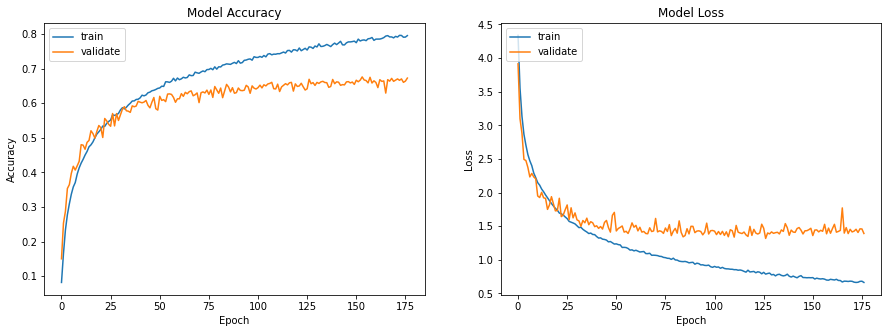

In [78]:
plot_model(model3history)

In [79]:
labels = labels_dictionary[0]
labels

0             apple
1     aquarium_fish
2              baby
3              bear
4            beaver
          ...      
95            whale
96      willow_tree
97             wolf
98            woman
99             worm
Name: 0, Length: 100, dtype: object

In [80]:
pred = model3.predict(X_test)

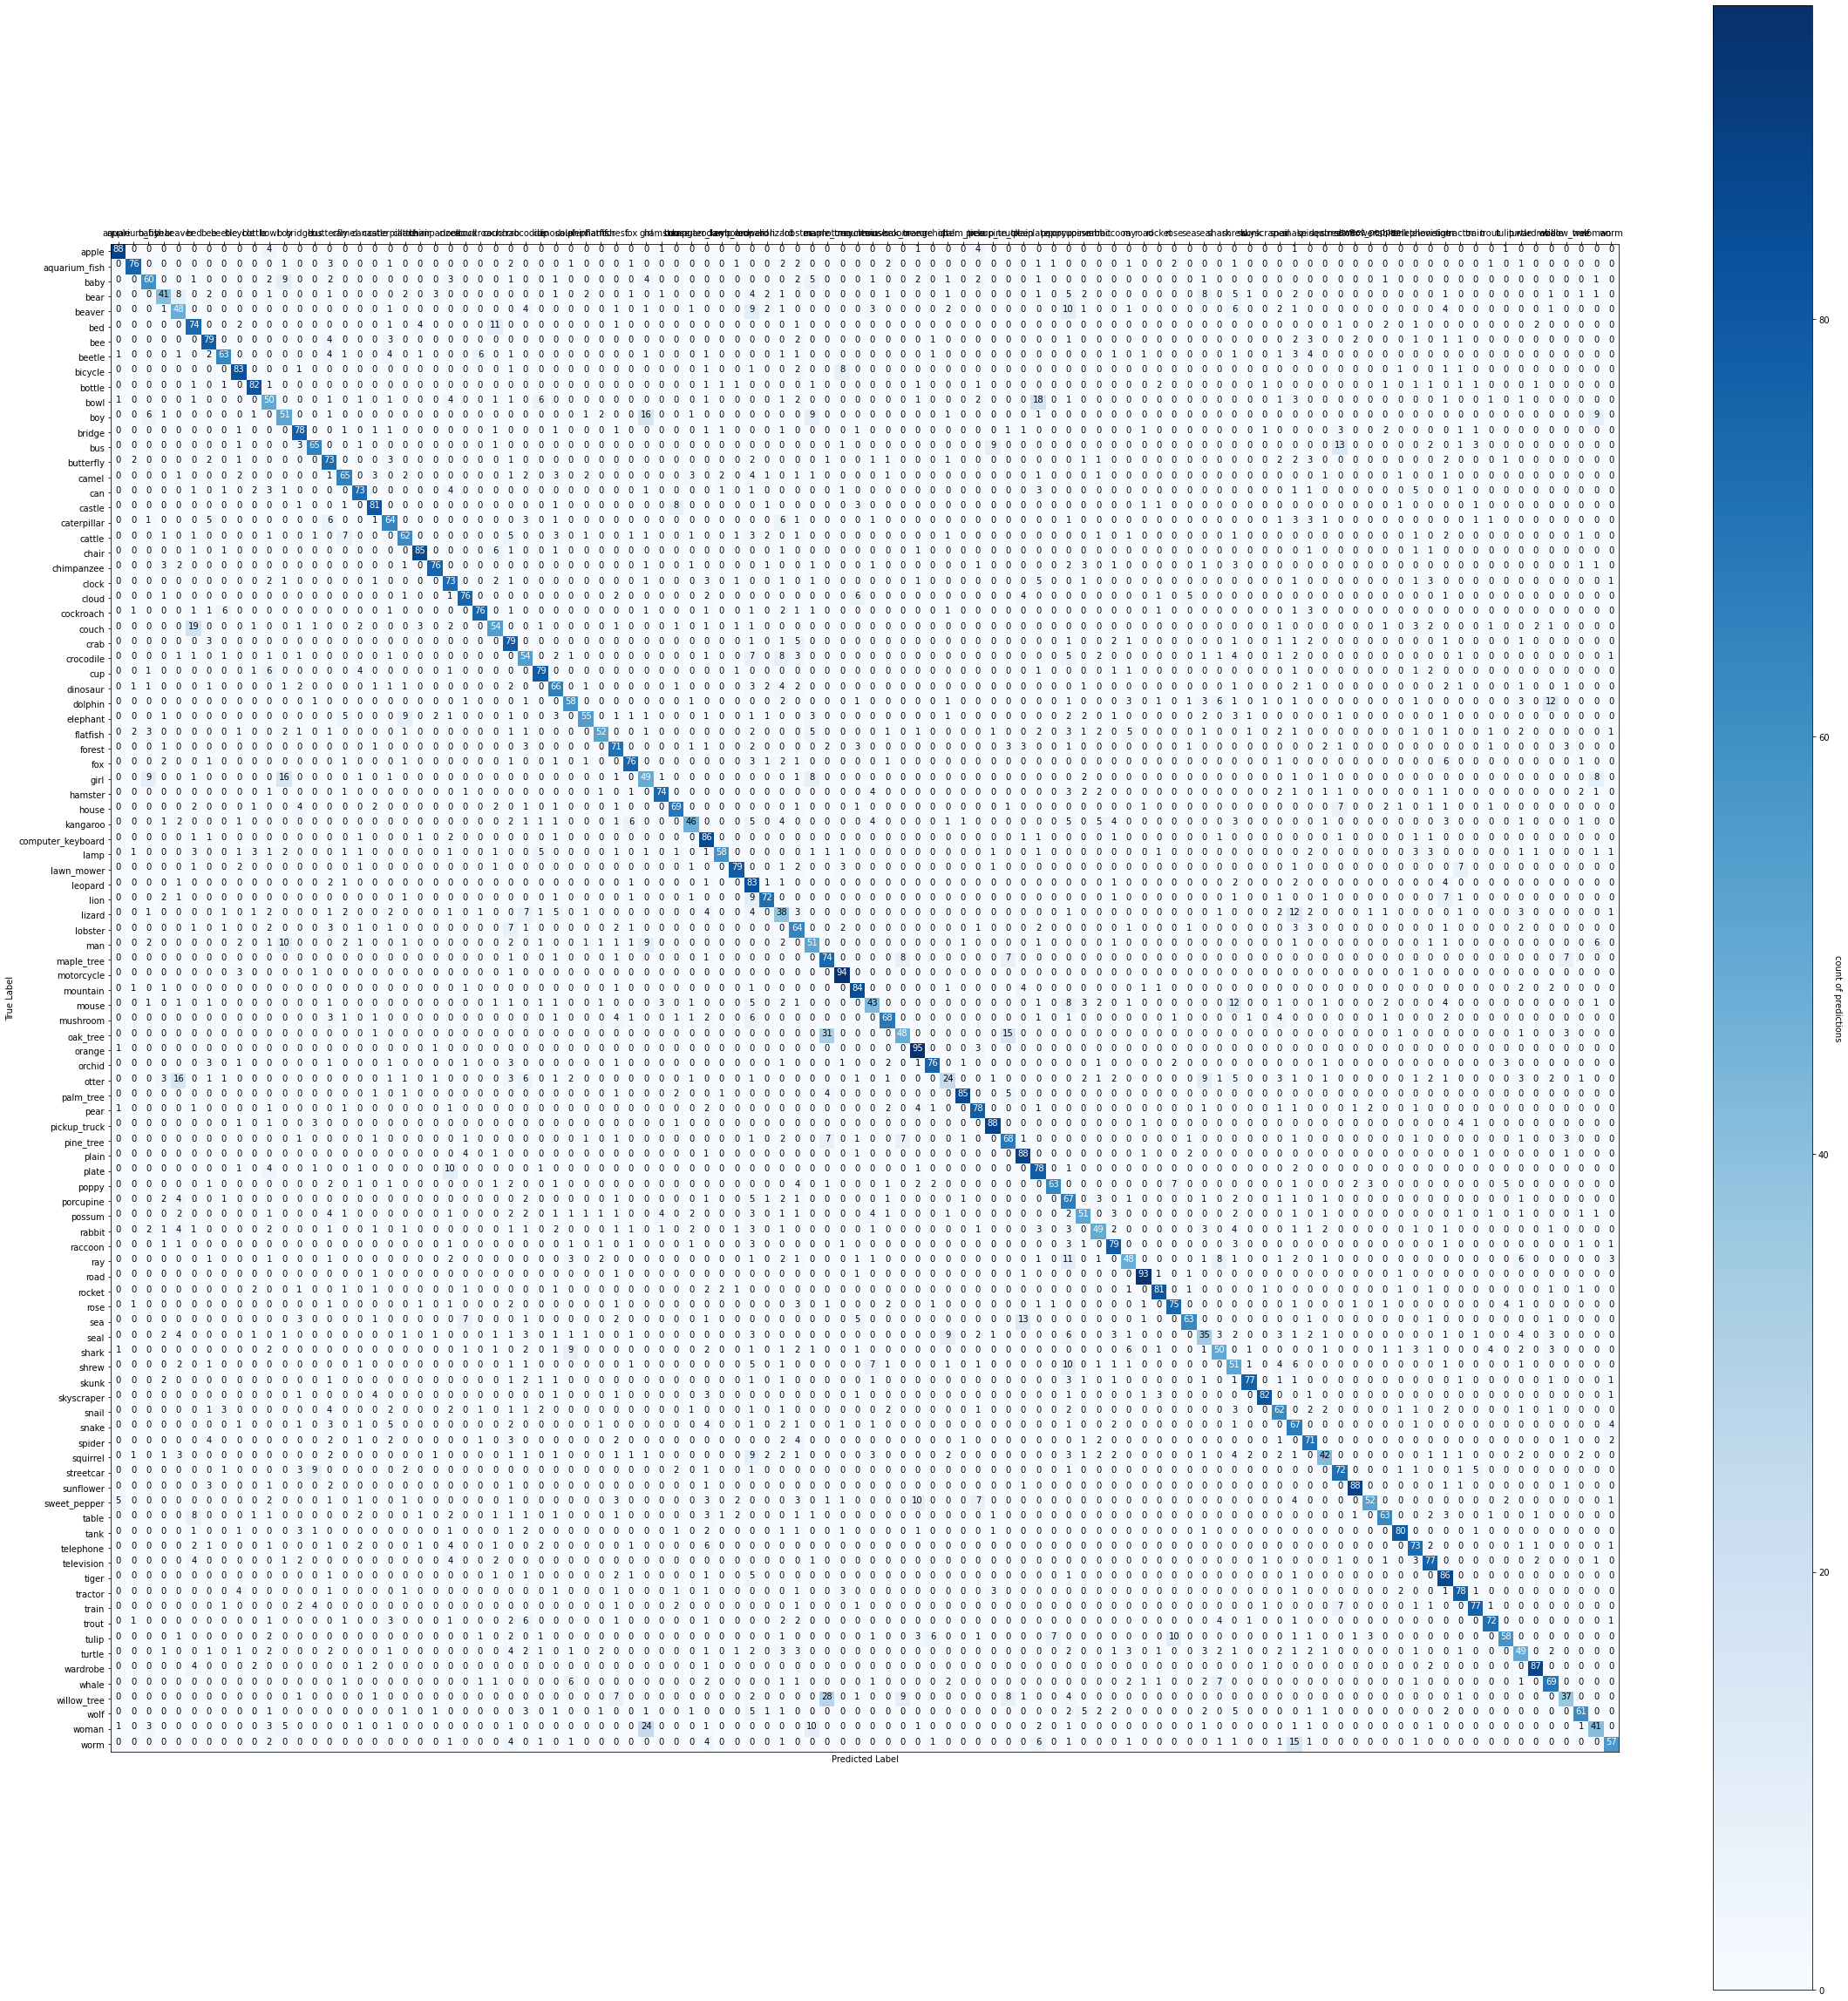

In [81]:
#labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_test[errors]

cm = confusion_matrix(y_true, y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(32,32))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

### Classification report

In [82]:
labels = labels_dictionary[0]
labels

0             apple
1     aquarium_fish
2              baby
3              bear
4            beaver
          ...      
95            whale
96      willow_tree
97             wolf
98            woman
99             worm
Name: 0, Length: 100, dtype: object

In [83]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       100
           1       0.87      0.76      0.81       100
           2       0.67      0.60      0.63       100
           3       0.59      0.41      0.49       100
           4       0.47      0.48      0.47       100
           5       0.56      0.74      0.64       100
           6       0.69      0.79      0.73       100
           7       0.77      0.63      0.69       100
           8       0.75      0.83      0.79       100
           9       0.84      0.82      0.83       100
          10       0.47      0.50      0.49       100
          11       0.50      0.51      0.51       100
          12       0.71      0.78      0.74       100
          13       0.75      0.65      0.70       100
          14       0.53      0.73      0.62       100
          15       0.69      0.65      0.67       100
          16       0.74      0.73      0.73       100
          17       0.76    

### Correct classifications

In [84]:
labels = labels_dictionary[0]
labels

0             apple
1     aquarium_fish
2              baby
3              bear
4            beaver
          ...      
95            whale
96      willow_tree
97             wolf
98            woman
99             worm
Name: 0, Length: 100, dtype: object

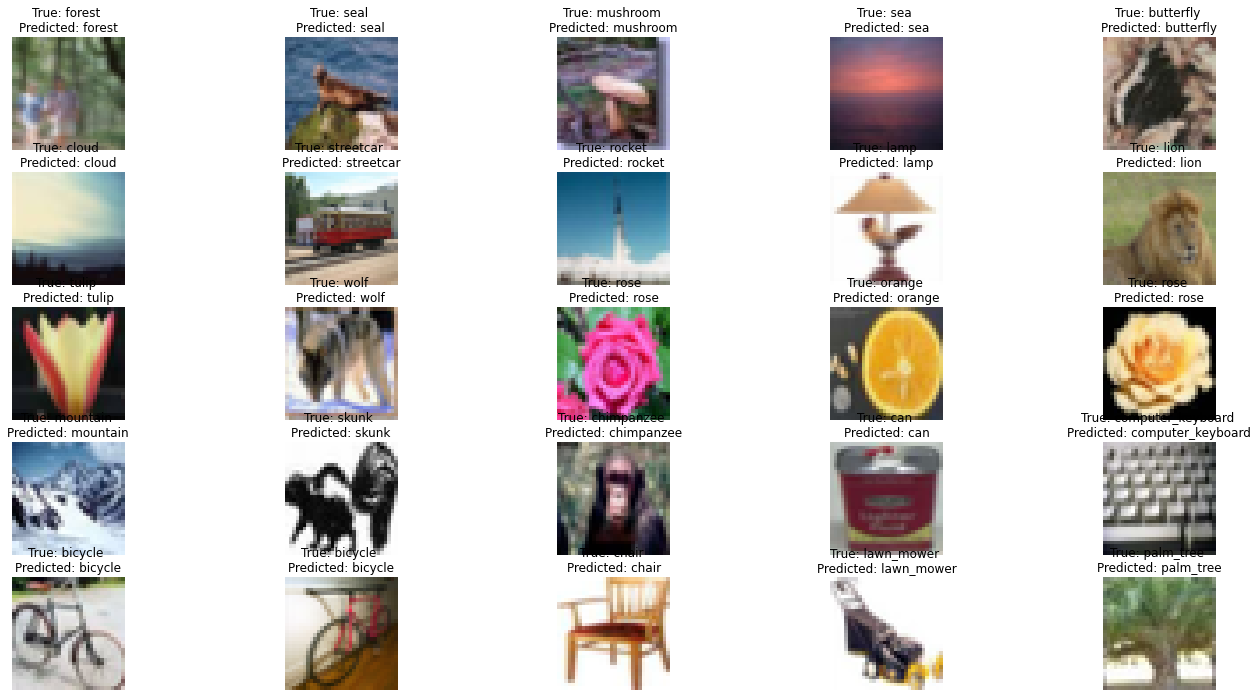

In [85]:
row = 5
column = 5
fig, axes = plt.subplots(row, column, figsize=(22,12))
axes = axes.ravel()

classified_idx = np.where(y_pred_classes == y_true)[0]
for i in np.arange(0, row*column):
    axes[i].imshow(X_test[classified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_true[classified_idx[i]]], 
                                                  labels[y_pred_classes[classified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

### Missclassifications

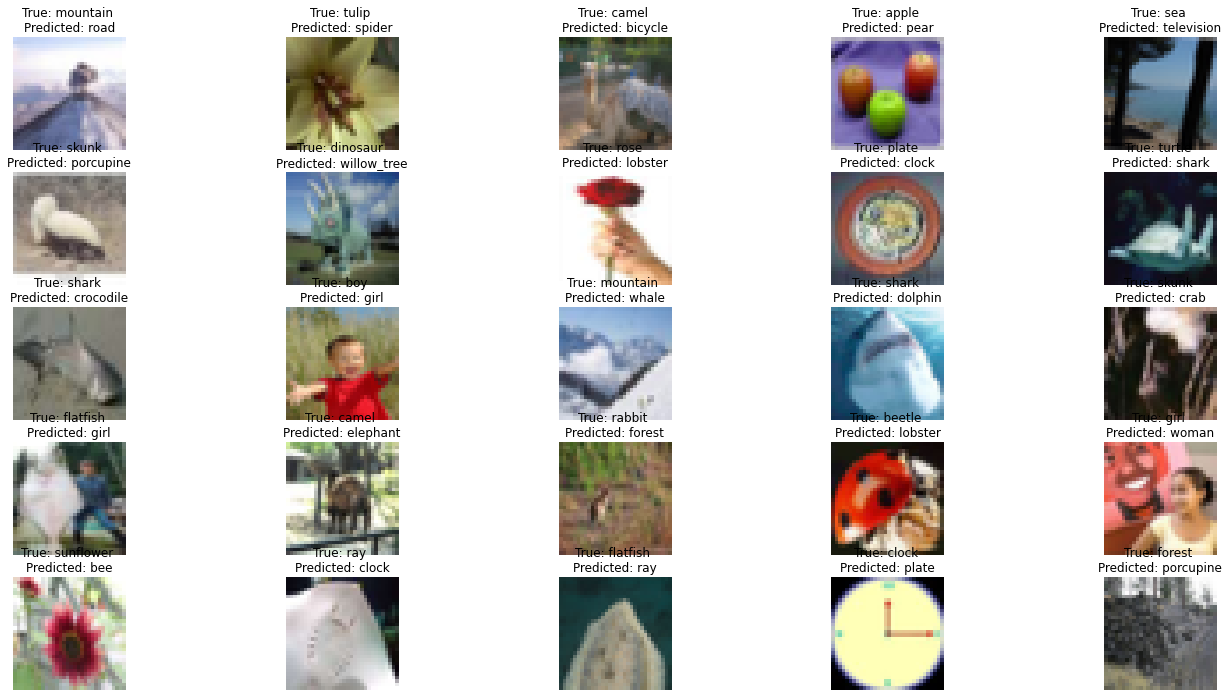

In [86]:
row = 5
column = 5
fig, axes = plt.subplots(row, column, figsize=(22,12))
axes = axes.ravel()

misclassified_idx = np.where(y_pred_classes != y_true)[0]
for i in np.arange(0, row*column):
    axes[i].imshow(X_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_true[misclassified_idx[i]]], 
                                                  labels[y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Report

* Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data.  
* Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.  
* Brief summary of data exploration and actions taken for data cleaning or feature engineering.  
* Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters.  
* A paragraph explaining which of your Deep Learning models you recommend as a final model that best fits your needs in terms of accuracy or explainability.  
* Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.  
* Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.  

You can run my notebook on Kaggle. GPU recommended:

https://www.kaggle.com/konutech/cifar100-image-classification-to-1-of-100-classes

# 1. Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data.  

The main objective of the analysis was to classify images with highest possible accuracy.  
Here, in my project images could have been classified by 100 classes, e.g. "mountain", "road".
Due to characteristics of the challenge I have used few variations of Convolutional Neural Networks (or CNN).  

Simplest benefit from implementation of image classification automation for a business area might be a case when a user is expected to upload a particular picture but instead he uses a random one.  
Let's imagine that insurence company expects to upload an image of a car but receives a picture of a horse.  

# 2. Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.  

The data I used comes from https://www.cs.toronto.edu/~kriz/cifar.html  
In contrary to the data set used during the course which was grouped by 10 classes, and for the sake of studying deep learning methods, I decided to increase the challenge of classification to 100 groups.  
The dimensions of training set are (50000, 32, 32, 3) so in other words:    
* the model was trained using 50.000 classified images  
* the images are in RBS scale and each one has 32*32 pixels  

Test set consists of 10.000 images.  

The labels are:  

labels_dictionary =\
{0: 'apple',
 1: 'aquarium_fish',
 2: 'baby',
 3: 'bear',
 4: 'beaver',
 5: 'bed',
 6: 'bee',
 7: 'beetle',
 8: 'bicycle',
 9: 'bottle',
 10: 'bowl',
 11: 'boy',
 12: 'bridge',
 13: 'bus',
 14: 'butterfly',
 15: 'camel',
 16: 'can',
 17: 'castle',
 18: 'caterpillar',
 19: 'cattle',
 20: 'chair',
 21: 'chimpanzee',
 22: 'clock',
 23: 'cloud',
 24: 'cockroach',
 25: 'couch',
 26: 'crab',
 27: 'crocodile',
 28: 'cup',
 29: 'dinosaur',
 30: 'dolphin',
 31: 'elephant',
 32: 'flatfish',
 33: 'forest',
 34: 'fox',
 35: 'girl',
 36: 'hamster',
 37: 'house',
 38: 'kangaroo',
 39: 'computer_keyboard',
 40: 'lamp',
 41: 'lawn_mower',
 42: 'leopard',
 43: 'lion',
 44: 'lizard',
 45: 'lobster',
 46: 'man',
 47: 'maple_tree',
 48: 'motorcycle',
 49: 'mountain',
 50: 'mouse',
 51: 'mushroom',
 52: 'oak_tree',
 53: 'orange',
 54: 'orchid',
 55: 'otter',
 56: 'palm_tree',
 57: 'pear',
 58: 'pickup_truck',
 59: 'pine_tree',
 60: 'plain',
 61: 'plate',
 62: 'poppy',
 63: 'porcupine',
 64: 'possum',
 65: 'rabbit',
 66: 'raccoon',
 67: 'ray',
 68: 'road',
 69: 'rocket',
 70: 'rose',
 71: 'sea',
 72: 'seal',
 73: 'shark',
 74: 'shrew',
 75: 'skunk',
 76: 'skyscraper',
 77: 'snail',
 78: 'snake',
 79: 'spider',
 80: 'squirrel',
 81: 'streetcar',
 82: 'sunflower',
 83: 'sweet_pepper',
 84: 'table',
 85: 'tank',
 86: 'telephone',
 87: 'television',
 88: 'tiger',
 89: 'tractor',
 90: 'train',
 91: 'trout',
 92: 'tulip',
 93: 'turtle',
 94: 'wardrobe',
 95: 'whale',
 96: 'willow_tree',
 97: 'wolf',
 98: 'woman',
 99: 'worm'}

### Every 1.000th image of Traing set

In [87]:
images_to_show = []
for i, image in enumerate(X_train):
    if (i + 1) % 1000 == 0:
        images_to_show.append(i)

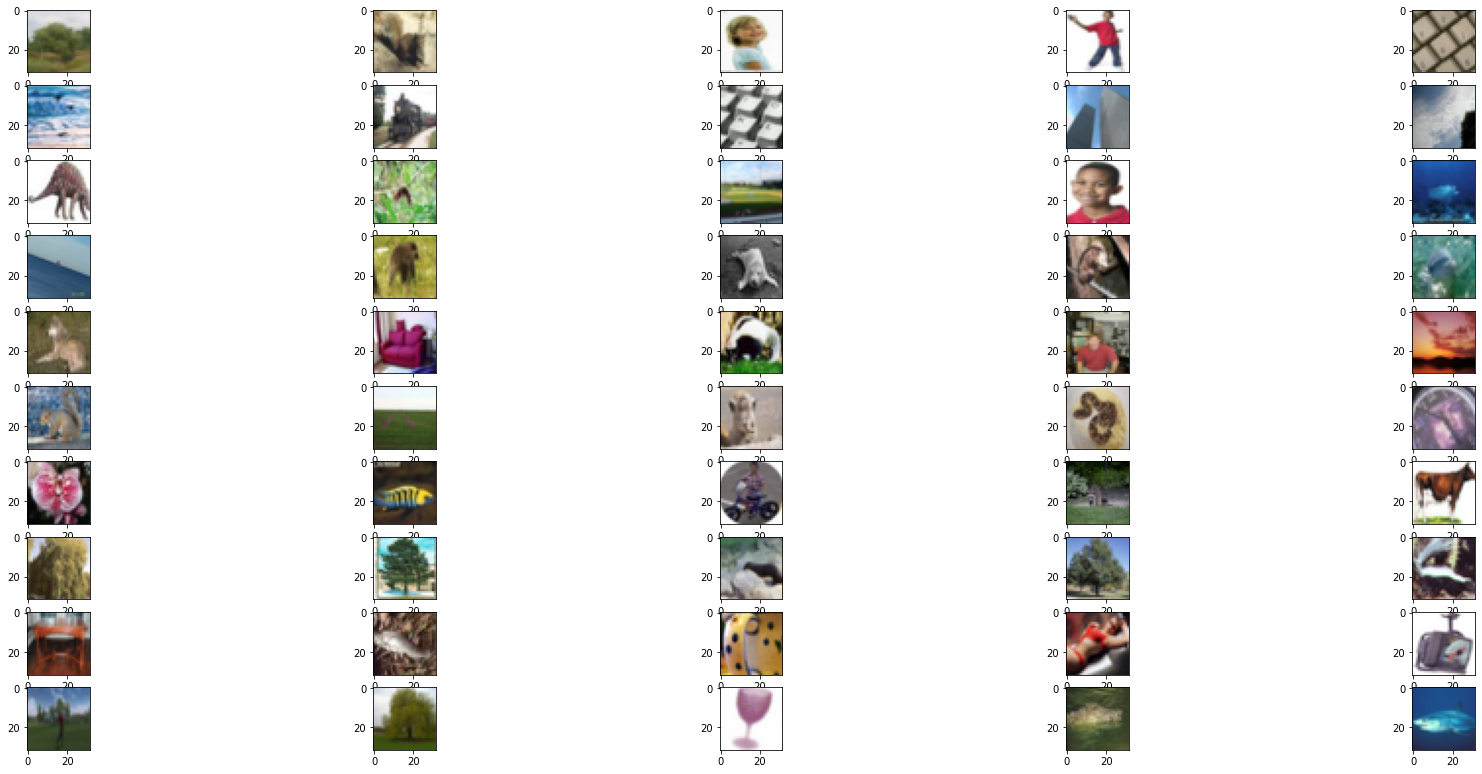

In [88]:
plt.figure(figsize=(30,15))
columns = 5
for i, image in enumerate(X_train[images_to_show]):
    plt.subplot(len(images_to_show) / columns + 1, columns, i + 1)
    plt.imshow(image)

# 3 Brief summary of data exploration and actions taken for data cleaning or feature engineering.  

The data set provided did not needed any actions related to data cleaning.  
In case of "feature engindeering" some action were taken known as Image Augmentation.  
Basically Image Augmentation provides solutions to increase the size of training set (provides new sample of images) due to simple changes in atrtibutes of images.  
The simplest examples of Image Augmentation are:
* vertical copies of images  
* shifts in orientation of images  
* rotations of images by some degrees

# 4 Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters.  

* Model 1 scored: 0.4682
* Model 2 scored: 0.6203
* Model 3 scored: 0.6763

##### Accuracy report for Model 1: 0.4711
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       100
           1       0.56      0.65      0.60       100
           2       0.34      0.23      0.28       100
           3       0.20      0.17      0.18       100
           4       0.31      0.20      0.24       100
           5       0.37      0.46      0.41       100
           6       0.46      0.50      0.48       100
           7       0.64      0.48      0.55       100
           8       0.71      0.55      0.62       100
           9       0.56      0.68      0.61       100
          10       0.49      0.33      0.40       100
          11       0.33      0.30      0.32       100
          12       0.50      0.52      0.51       100
          13       0.39      0.48      0.43       100
          14       0.44      0.43      0.44       100
          15       0.42      0.39      0.41       100
          16       0.62      0.44      0.51       100
          17       0.50      0.65      0.57       100
          18       0.36      0.38      0.37       100
          19       0.38      0.37      0.38       100
          20       0.68      0.77      0.72       100
          21       0.44      0.64      0.52       100
          22       0.49      0.45      0.47       100
          23       0.70      0.61      0.65       100
          24       0.72      0.62      0.67       100
          25       0.36      0.38      0.37       100
          26       0.48      0.30      0.37       100
          27       0.29      0.25      0.27       100
          28       0.74      0.70      0.72       100
          29       0.45      0.47      0.46       100
          30       0.46      0.43      0.45       100
          31       0.39      0.43      0.41       100
          32       0.39      0.28      0.33       100
          33       0.51      0.43      0.47       100
          34       0.44      0.43      0.44       100
          35       0.27      0.32      0.29       100
          36       0.46      0.47      0.47       100
          37       0.48      0.51      0.50       100
          38       0.28      0.30      0.29       100
          39       0.59      0.55      0.57       100
          40       0.40      0.42      0.41       100
          41       0.68      0.69      0.69       100
          42       0.49      0.49      0.49       100
          43       0.61      0.49      0.54       100
          44       0.17      0.14      0.15       100
          45       0.38      0.34      0.36       100
          46       0.26      0.36      0.30       100
          47       0.58      0.57      0.58       100
          48       0.63      0.85      0.72       100
          49       0.59      0.50      0.54       100
          50       0.31      0.26      0.28       100
          51       0.34      0.39      0.36       100
          52       0.54      0.72      0.62       100
          53       0.55      0.77      0.64       100
          54       0.48      0.65      0.55       100
          55       0.20      0.16      0.18       100
          56       0.62      0.65      0.63       100
          57       0.57      0.54      0.55       100
          58       0.63      0.64      0.64       100
          59       0.53      0.37      0.44       100
          60       0.63      0.79      0.70       100
          61       0.50      0.52      0.51       100
          62       0.51      0.62      0.56       100
          63       0.51      0.44      0.47       100
          64       0.31      0.31      0.31       100
          65       0.23      0.28      0.25       100
          66       0.41      0.37      0.39       100
          67       0.44      0.23      0.30       100
          68       0.75      0.86      0.80       100
          69       0.50      0.66      0.57       100
          70       0.45      0.50      0.47       100
          71       0.64      0.43      0.51       100
          72       0.20      0.16      0.18       100
          73       0.38      0.43      0.40       100
          74       0.39      0.20      0.26       100
          75       0.61      0.70      0.65       100
          76       0.55      0.80      0.65       100
          77       0.32      0.24      0.27       100
          78       0.30      0.29      0.29       100
          79       0.49      0.43      0.46       100
          80       0.33      0.22      0.26       100
          81       0.60      0.47      0.53       100
          82       0.61      0.76      0.68       100
          83       0.41      0.38      0.40       100
          84       0.42      0.32      0.36       100
          85       0.60      0.58      0.59       100
          86       0.39      0.61      0.47       100
          87       0.47      0.60      0.52       100
          88       0.57      0.52      0.54       100
          89       0.56      0.44      0.49       100
          90       0.41      0.48      0.44       100
          91       0.64      0.56      0.60       100
          92       0.31      0.47      0.38       100
          93       0.30      0.19      0.23       100
          94       0.74      0.84      0.79       100
          95       0.49      0.55      0.52       100
          96       0.48      0.35      0.40       100
          97       0.36      0.53      0.43       100
          98       0.22      0.22      0.22       100
          99       0.47      0.51      0.49       100  
  
    accuracy                           0.47     10000  

##### Accuracy report for Model 2:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       100
           1       0.66      0.72      0.69       100
           2       0.52      0.49      0.50       100
           3       0.31      0.38      0.34       100
           4       0.30      0.54      0.39       100
           5       0.58      0.59      0.59       100
           6       0.69      0.74      0.71       100
           7       0.66      0.55      0.60       100
           8       0.80      0.82      0.81       100
           9       0.80      0.70      0.74       100
          10       0.54      0.48      0.51       100
          11       0.42      0.40      0.41       100
          12       0.64      0.69      0.67       100
          13       0.84      0.56      0.67       100
          14       0.72      0.46      0.56       100
          15       0.68      0.63      0.66       100
          16       0.71      0.62      0.66       100
          17       0.80      0.78      0.79       100
          18       0.60      0.44      0.51       100
          19       0.59      0.50      0.54       100
          20       0.89      0.79      0.84       100
          21       0.64      0.84      0.73       100
          22       0.61      0.60      0.60       100
          23       0.69      0.86      0.76       100
          24       0.71      0.77      0.74       100
          25       0.53      0.55      0.54       100
          26       0.57      0.56      0.57       100
          27       0.34      0.57      0.43       100
          28       0.87      0.76      0.81       100
          29       0.72      0.54      0.62       100
          30       0.48      0.65      0.55       100
          31       0.66      0.61      0.64       100
          32       0.58      0.59      0.58       100
          33       0.64      0.59      0.61       100
          34       0.67      0.63      0.65       100
          35       0.42      0.33      0.37       100
          36       0.72      0.56      0.63       100
          37       0.62      0.65      0.64       100
          38       0.58      0.45      0.51       100
          39       0.84      0.76      0.80       100
          40       0.64      0.47      0.54       100
          41       0.84      0.79      0.81       100
          42       0.63      0.66      0.64       100
          43       0.65      0.71      0.68       100
          44       0.33      0.41      0.36       100
          45       0.43      0.62      0.51       100
          46       0.43      0.47      0.45       100
          47       0.66      0.57      0.61       100
          48       0.83      0.86      0.85       100
          49       0.73      0.85      0.79       100
          50       0.33      0.34      0.34       100
          51       0.72      0.59      0.65       100
          52       0.54      0.80      0.65       100
          53       0.70      0.85      0.77       100
          54       0.62      0.74      0.68       100
          55       0.25      0.22      0.23       100
          56       0.89      0.81      0.85       100
          57       0.77      0.66      0.71       100
          58       0.75      0.79      0.77       100
          59       0.69      0.49      0.57       100
          60       0.89      0.72      0.80       100
          61       0.73      0.70      0.71       100
          62       0.69      0.66      0.68       100
          63       0.70      0.50      0.58       100
          64       0.38      0.43      0.41       100
          65       0.55      0.41      0.47       100
          66       0.72      0.58      0.64       100
          67       0.45      0.53      0.48       100
          68       0.87      0.91      0.89       100
          69       0.78      0.76      0.77       100
          70       0.69      0.64      0.66       100
          71       0.70      0.81      0.75       100
          72       0.23      0.41      0.29       100
          73       0.40      0.43      0.41       100
          74       0.42      0.45      0.44       100
          75       0.92      0.80      0.86       100
          76       0.85      0.79      0.82       100
          77       0.64      0.53      0.58       100
          78       0.49      0.48      0.49       100
          79       0.72      0.57      0.64       100
          80       0.34      0.38      0.36       100
          81       0.66      0.73      0.70       100
          82       0.93      0.84      0.88       100
          83       0.70      0.50      0.58       100
          84       0.60      0.57      0.58       100
          85       0.68      0.83      0.75       100
          86       0.71      0.67      0.69       100
          87       0.70      0.71      0.71       100
          88       0.82      0.58      0.68       100
          89       0.76      0.71      0.73       100
          90       0.65      0.80      0.72       100
          91       0.74      0.69      0.72       100
          92       0.55      0.62      0.58       100
          93       0.43      0.46      0.45       100
          94       0.87      0.87      0.87       100
          95       0.61      0.54      0.57       100
          96       0.53      0.54      0.54       100
          97       0.67      0.62      0.64       100
          98       0.40      0.36      0.38       100
          99       0.67      0.62      0.64       100

    accuracy                           0.62     10000

##### Accuracy report for Model 3:  
            precision    recall  f1-score   support

           0       0.89      0.88      0.88       100
           1       0.87      0.76      0.81       100
           2       0.67      0.60      0.63       100
           3       0.59      0.41      0.49       100
           4       0.47      0.48      0.47       100
           5       0.56      0.74      0.64       100
           6       0.69      0.79      0.73       100
           7       0.77      0.63      0.69       100
           8       0.75      0.83      0.79       100
           9       0.84      0.82      0.83       100
          10       0.47      0.50      0.49       100
          11       0.50      0.51      0.51       100
          12       0.71      0.78      0.74       100
          13       0.75      0.65      0.70       100
          14       0.53      0.73      0.62       100
          15       0.69      0.65      0.67       100
          16       0.74      0.73      0.73       100
          17       0.76      0.81      0.79       100
          18       0.62      0.64      0.63       100
          19       0.68      0.62      0.65       100
          20       0.88      0.85      0.86       100
          21       0.88      0.76      0.82       100
          22       0.59      0.73      0.65       100
          23       0.81      0.76      0.78       100
          24       0.87      0.76      0.81       100
          25       0.59      0.54      0.57       100
          26       0.51      0.79      0.62       100
          27       0.47      0.54      0.50       100
          28       0.76      0.79      0.77       100
          29       0.60      0.66      0.63       100
          30       0.68      0.58      0.63       100
          31       0.81      0.55      0.65       100
          32       0.80      0.52      0.63       100
          33       0.59      0.71      0.64       100
          34       0.77      0.76      0.76       100
          35       0.43      0.49      0.46       100
          36       0.87      0.74      0.80       100
          37       0.77      0.69      0.73       100
          38       0.69      0.46      0.55       100
          39       0.56      0.86      0.68       100
          40       0.87      0.58      0.69       100
          41       0.86      0.79      0.82       100
          42       0.39      0.83      0.53       100
          43       0.80      0.72      0.76       100
          44       0.34      0.38      0.36       100
          45       0.49      0.64      0.56       100
          46       0.51      0.51      0.51       100
          47       0.49      0.74      0.59       100
          48       0.80      0.94      0.86       100
          49       0.74      0.84      0.79       100
          50       0.55      0.43      0.48       100
          51       0.77      0.68      0.72       100
          52       0.67      0.48      0.56       100
          53       0.75      0.95      0.84       100
          54       0.85      0.76      0.80       100
          55       0.47      0.24      0.32       100
          56       0.93      0.85      0.89       100
          57       0.74      0.78      0.76       100
          58       0.82      0.88      0.85       100
          59       0.63      0.68      0.65       100
          60       0.75      0.88      0.81       100
          61       0.59      0.78      0.67       100
          62       0.88      0.63      0.73       100
          63       0.38      0.67      0.49       100
          64       0.63      0.51      0.56       100
          65       0.63      0.49      0.55       100
          66       0.71      0.79      0.75       100
          67       0.61      0.48      0.54       100
          68       0.89      0.93      0.91       100
          69       0.84      0.81      0.83       100
          70       0.77      0.75      0.76       100
          71       0.83      0.63      0.72       100
          72       0.44      0.35      0.39       100
          73       0.59      0.50      0.54       100
          74       0.39      0.51      0.44       100
          75       0.90      0.77      0.83       100
          76       0.92      0.82      0.87       100
          77       0.59      0.62      0.60       100
          78       0.41      0.67      0.51       100
          79       0.63      0.71      0.67       100
          80       0.66      0.42      0.51       100
          81       0.67      0.72      0.69       100
          82       0.92      0.88      0.90       100
          83       0.85      0.52      0.65       100
          84       0.80      0.63      0.70       100
          85       0.87      0.80      0.83       100
          86       0.65      0.73      0.69       100
          87       0.71      0.77      0.74       100
          88       0.57      0.86      0.69       100
          89       0.74      0.78      0.76       100
          90       0.82      0.77      0.79       100
          91       0.84      0.72      0.77       100
          92       0.78      0.58      0.67       100
          93       0.53      0.49      0.51       100
          94       0.90      0.87      0.88       100
          95       0.68      0.69      0.69       100
          96       0.65      0.37      0.47       100
          97       0.81      0.61      0.70       100
          98       0.57      0.41      0.48       100
          99       0.74      0.57      0.64       100

    accuracy                           0.67     10000

### Confusion matrix

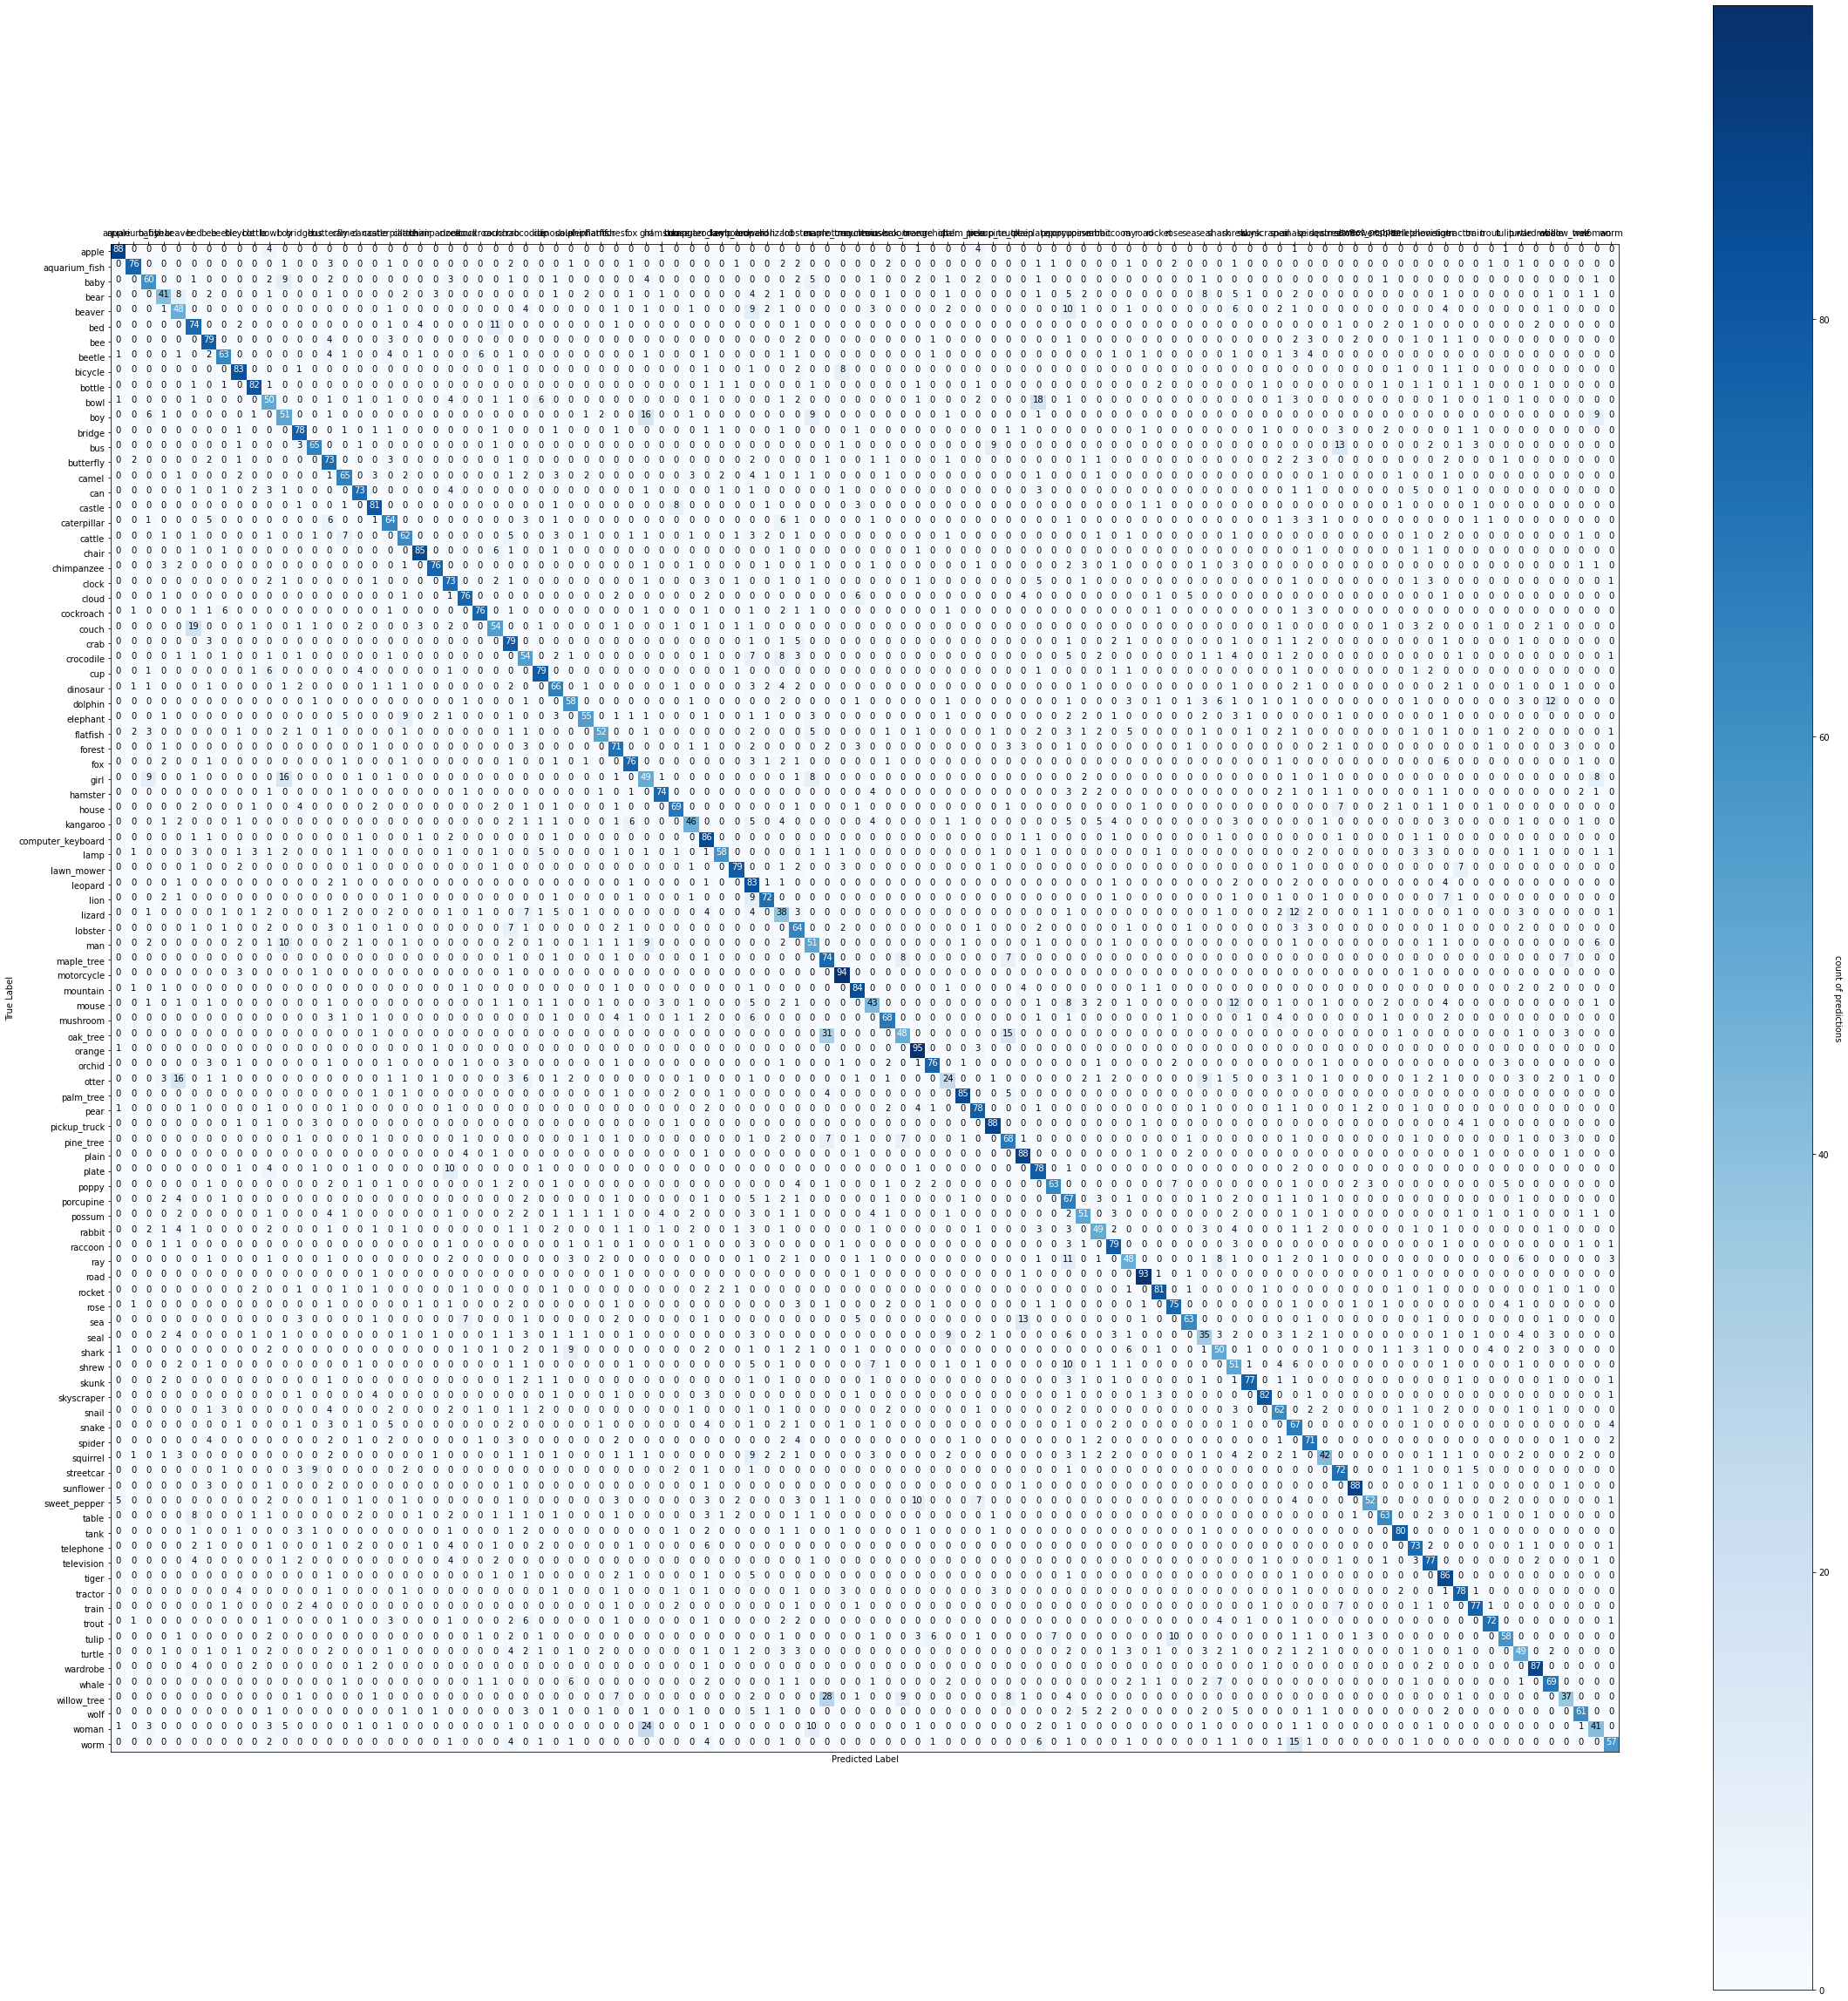

In [92]:
#labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_test[errors]

cm = confusion_matrix(y_true, y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(32,32))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

Examples of correct classifications from Model 3.:

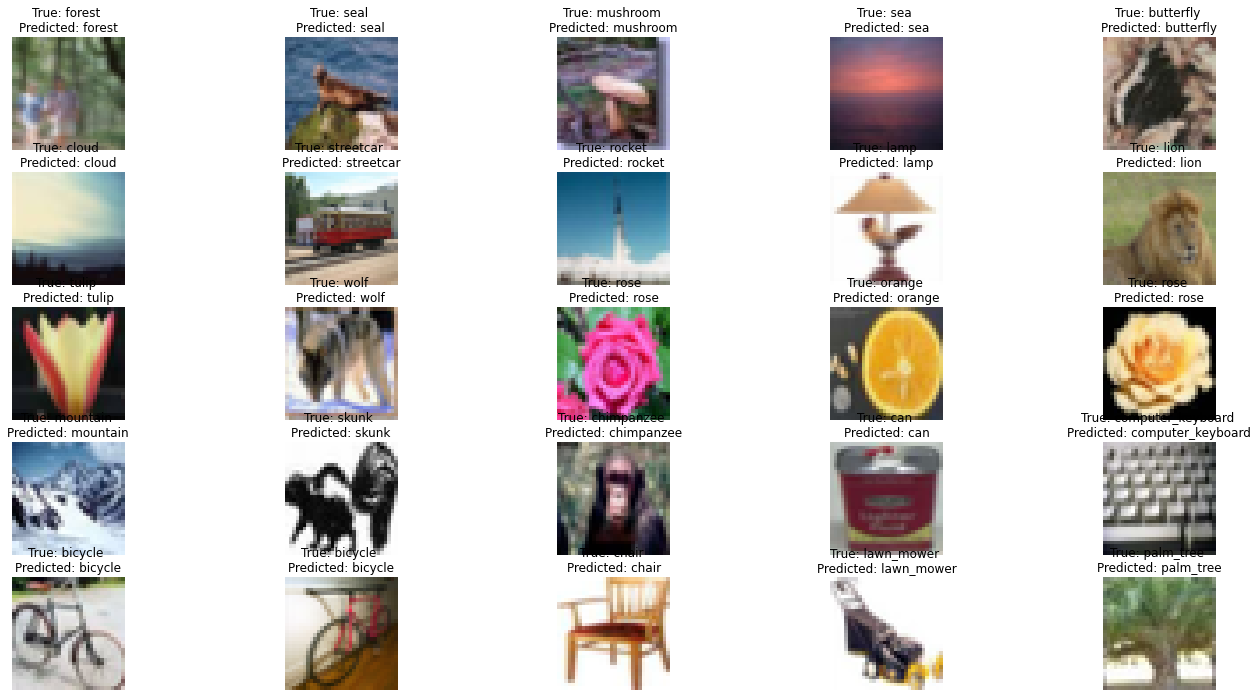

In [90]:
row = 5
column = 5
fig, axes = plt.subplots(row, column, figsize=(22,12))
axes = axes.ravel()

classified_idx = np.where(y_pred_classes == y_true)[0]
for i in np.arange(0, row*column):
    axes[i].imshow(X_test[classified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_true[classified_idx[i]]], 
                                                  labels[y_pred_classes[classified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

Examples of misclassifications from Model 3.:

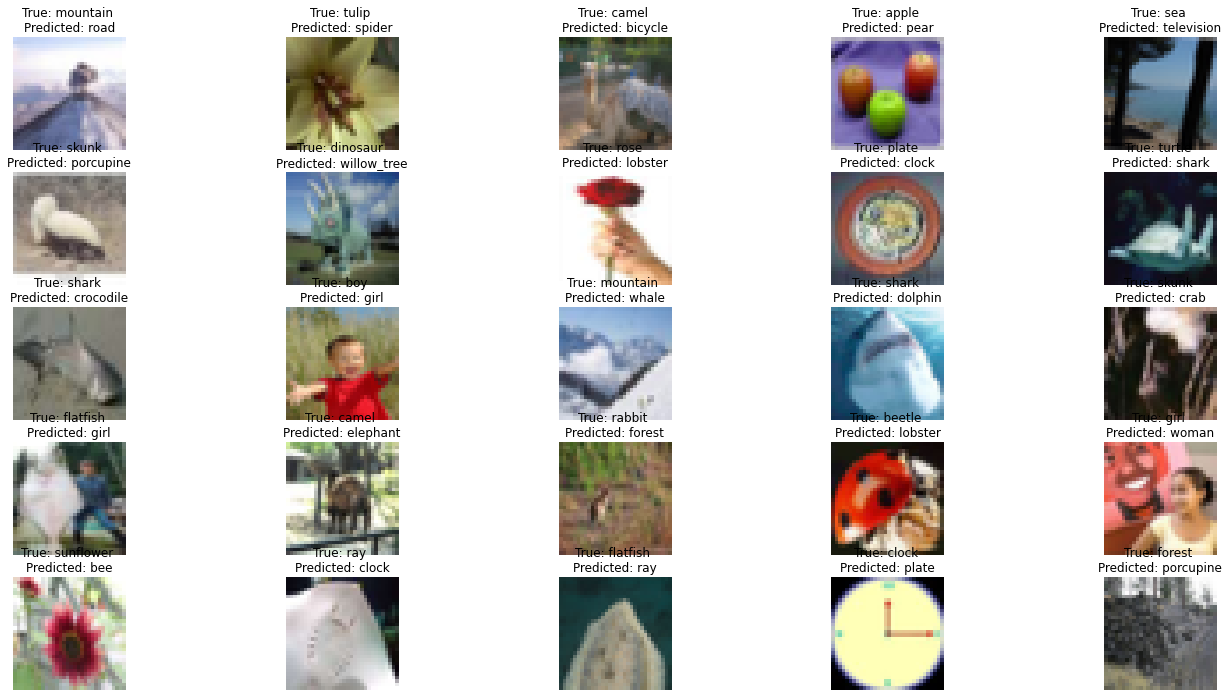

In [91]:
row = 5
column = 5
fig, axes = plt.subplots(row, column, figsize=(22,12))
axes = axes.ravel()

misclassified_idx = np.where(y_pred_classes != y_true)[0]
for i in np.arange(0, row*column):
    axes[i].imshow(X_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_true[misclassified_idx[i]]], 
                                                  labels[y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# 5 A paragraph explaining which of your Deep Learning models you recommend as a final model that best fits your needs in terms of accuracy or explainability.

Due to characteristics of the problem I value accuracy more than explainability.  
The model I recommend as a final one is the model with highest accuracy on a validation data set.  
Model 3. with some Image Augmentation methods proved to be the best one.  

# 6 Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.  

All train models were trained on more-less similar initial architecture. Nonetheless they were slightly diffrent in few aspects.  
* Model 1 was trained without Pooling.
   - in a comparison to Model 2 significant drop of accuracy was noted  
   - removing Pooling increased significantly overall time needed for processing of each Epoch  
* Model 2 was trained with same architecture as Model 1 but with an addition of Pooling
   - adding Pooling lowered time needed for processing of each Epoch
   - the accuracy increased from 0.47920 to 0.62780
* Model 3 was trained with same architecture as Model 2 but with an addition of Image Augmentation  
   - the accuracy increased from 0.62780 to 0.67630

# 7 Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.  

* There is still a space for more experiments and exploration with available Image Augmentation methods.  
* Moving from Keras which is indeed high level library to more sophisticated one like TensorFlow might prove beneficial as well.

You can run my notebook on Kaggle. GPU recommended:

https://www.kaggle.com/konutech/cifar100-image-classification-to-1-of-100-classes